In [1]:
import pandas as pd
import json
import numpy as np

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

import plotly
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


In [69]:

## Code modified from 
## https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [10]:
##read in json into dataframe
with open('Sarcasm_Headlines_Dataset_v2.json', encoding = "utf8") as file:
    data = file.readlines()
data = map(lambda x: x.rstrip(), data)
data_json = "[" + ",".join(data) +"]"
    
data_frame = pd.read_json(data_json)


with open('Sarcasm_Headlines_Dataset.json', encoding = "utf8") as file:
    data = file.readlines()
data = map(lambda x: x.rstrip(), data)
data_json = "[" + ",".join(data) +"]"
    
data_frame_other = pd.read_json(data_json)
print(len(data_frame_other))
print(len(data_frame))
data_test_v2 = data_frame['article_link'].values
data_test_v1 = data_frame_other['article_link'].values



duplicates = []
non_duplicates = []
for x in data_test_v1:
    if x in data_test_v2:
        duplicates.append(x)
    else:
        non_duplicates.append(x)
    
print(len(duplicates))
print(len(non_duplicates))

26709
28619
26709
0


In [11]:
## open and store article content

with open('article_content.json') as json_file:
    data_article_content = json.load(json_file)
    
print(data_article_content[str(0)]['link'])

https://www.huffingtonpost.com/entry/eat-your-veggies-9-delici_b_8899742.html


In [83]:

X_train, X_test, y_train, y_test = train_test_split(
    data_frame['headline'], 
    data_frame['is_sarcastic'], 
    random_state = 1
)
#print(X_train, y_train)
print(X_train.shape[0])
print(X_test.shape[0])


21464
7155


In [84]:
count_vector = CountVectorizer(stop_words = 'english')
training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)

In [85]:
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

predictions = naive_bayes.predict(testing_data)
predictions.shape[0]

7155

In [86]:
### Scores for article headlines ###
h_accuracy = accuracy_score(y_test, predictions)
h_recall = recall_score(y_test, predictions, average = 'weighted')
h_precision = precision_score(y_test, predictions, average = 'weighted')
h_f1 = f1_score(y_test, predictions, average = 'weighted')

print("Accuracy score: ", h_accuracy)
print("Recall score: ",h_recall)
print("Precision score: ", h_precision)
print("F1 score: ", h_f1)

Accuracy score:  0.7997204751921733
Recall score:  0.7997204751921733
Precision score:  0.7996792454964032
F1 score:  0.799680701367876


Confusion matrix, without normalization
[[3006  699]
 [ 734 2716]]
Normalized confusion matrix
[[0.81133603 0.18866397]
 [0.21275362 0.78724638]]


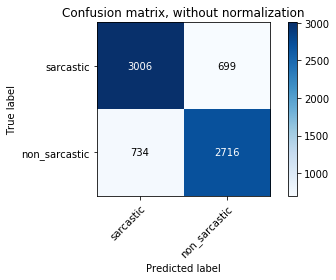

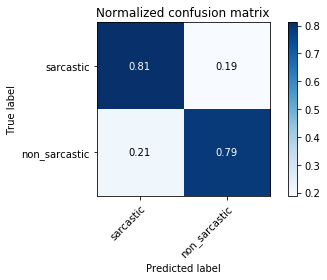

In [87]:
plot_confusion_matrix(y_test, predictions, ['sarcastic', 'non_sarcastic'], normalize=False)
plot_confusion_matrix(y_test, predictions, ['sarcastic', 'non_sarcastic'], normalize=True)

In [ ]:
## all articles headlines
comment_words = ' '
stopwords = set(STOPWORDS) 
 
for val in data_frame['headline']: 
    #print(val)  
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '    

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
    
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
#sarcastic article headlines
#code modified from https://www.geeksforgeeks.org/generating-word-cloud-python/

for i, val in enumerate(data_frame['headline'],1): 
    if (data_frame['is_sarcastic'][i] == 1):
        #print(val)  
        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '  

In [ ]:
## non_sarcastic article headlines
for i, val in enumerate(data_frame['headline'],1): 
    if (data_frame['is_sarcastic'][i] == 0):
        #print(val)  
        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '

In [88]:
##new dataframe using full text as features 

counter = 0
non_empty_articles_y = []
non_empty_article_content = []
for index, row in data_frame.iterrows():
    if row['article_link'] == data_article_content[str(counter)]['link']:
        non_empty_articles_y.append(row['is_sarcastic'])
        non_empty_article_content.append(data_article_content[str(counter)]['content'])
        counter += 1
        
new_data_frame = pd.DataFrame()
new_data_frame['article_content'] = non_empty_article_content
new_data_frame['labels'] = non_empty_articles_y

new_data_frame.head()

,article_content,labels
0,Vegetables don't have to be boring or relegate...,0
1,"PROVIDENCE, RI—In spite of his best efforts to...",1
2,"PATERSON, NJ—Family sources told reporters Tue...",1
3,To what extent do you own your inheritance?\n\...,0
4,"Even with years of experience, the process of ...",0


In [89]:
X_train, X_test, y_train, y_test = train_test_split(
    new_data_frame['article_content'], 
    new_data_frame['labels'], 
    random_state = 1
)

In [90]:
count_vector = CountVectorizer(stop_words = 'english')
training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)

naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

predictions = naive_bayes.predict(testing_data)

predictions

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

Confusion matrix, without normalization
[[1821  178]
 [ 146 2628]]
Normalized confusion matrix
[[0.91095548 0.08904452]
 [0.05263158 0.94736842]]


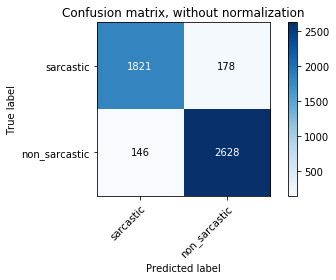

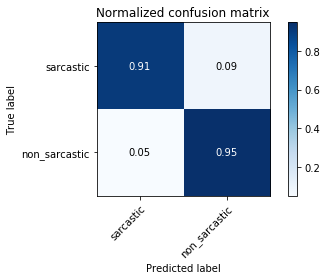

In [91]:
plot_confusion_matrix(y_test, predictions, ['sarcastic', 'non_sarcastic'], normalize=False)
plot_confusion_matrix(y_test, predictions, ['sarcastic', 'non_sarcastic'], normalize=True)

In [92]:
## content accuracy ##

c_accuracy = accuracy_score(y_test, predictions)
c_recall = recall_score(y_test, predictions, average = 'weighted')
c_precision = precision_score(y_test, predictions, average = 'weighted')
c_f1 = f1_score(y_test, predictions, average = 'weighted')



print("Accuracy score: ", c_accuracy)
print("Recall score: ",c_recall)
print("Precision score: ", c_precision)
print("F1 score: ", c_f1)

Accuracy score:  0.9321181646763043
Recall score:  0.9321181646763043
Precision score:  0.9320458297100551
F1 score:  0.9320389528219852


In [13]:
'''svm = svm.SVC()

svm.fit(training_data, y_train)
y_pred = svm.predict(testing_data)

svm_accuracy = accuracy_score(y_test, predictions)
svm_recall = recall_score(y_test, predictions, average = 'weighted')
svm_precision = precision_score(y_test, predictions, average = 'weighted')
svm_f1 = f1_score(y_test, predictions, average = 'weighted')


print("Accuracy score: ", svm_accuracy)
print("Recall score: ",svm_recall)
print("Precision score: ", svm_precision)
print("F1 score: ", svm_f1)
 ## support vector and c'''

d:\python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



Accuracy score:  0.9321181646763043
Recall score:  0.9321181646763043
Precision score:  0.9320458297100551
F1 score:  0.9320389528219852


In [93]:
### content and headlines ### 

counter = 0
non_empty_articles_y = []
non_empty_article_content = []
non_empty_article_headline = []
for index, row in data_frame.iterrows():
    if row['article_link'] == data_article_content[str(counter)]['link']:
        non_empty_articles_y.append(row['is_sarcastic'])
        non_empty_article_content.append(data_article_content[str(counter)]['content'])
        non_empty_article_headline.append(row['headline'])
        counter += 1
        
new_data_frame = pd.DataFrame()
new_data_frame['article_content'] = non_empty_article_content
new_data_frame['headline'] = non_empty_article_headline
new_data_frame['labels'] = non_empty_articles_y

new_data_frame.head()


,article_content,headline,labels
0,Vegetables don't have to be boring or relegate...,eat your veggies: 9 deliciously different recipes,0
1,"PROVIDENCE, RI—In spite of his best efforts to...",inclement weather prevents liar from getting t...,1
2,"PATERSON, NJ—Family sources told reporters Tue...",mother comes pretty close to using word 'strea...,1
3,To what extent do you own your inheritance?\n\...,my white inheritance,0
4,"Even with years of experience, the process of ...",5 ways to file your taxes with less stress,0


In [94]:
X_train, X_test, y_train, y_test = train_test_split(
    new_data_frame['article_content'] + new_data_frame['headline'], 
    new_data_frame['labels'],
    random_state = 1
)

count_vector = CountVectorizer(stop_words = 'english')
training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)

naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

predictions = naive_bayes.predict(testing_data)
predictions

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

Confusion matrix, without normalization
[[1826  173]
 [ 272 2502]]
Normalized confusion matrix
[[0.91345673 0.08654327]
 [0.09805335 0.90194665]]


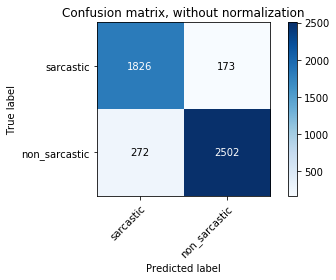

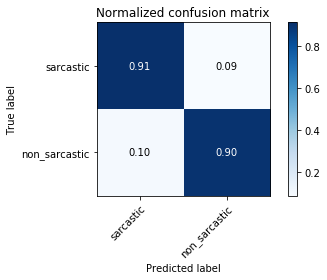

In [98]:
plot_confusion_matrix(y_test, predictions, ['sarcastic', 'non_sarcastic'], normalize=False)
plot_confusion_matrix(y_test, predictions, ['sarcastic', 'non_sarcastic'], normalize=True)

In [96]:

hc_accuracy = accuracy_score(y_test, predictions)
hc_recall = recall_score(y_test, predictions, average = 'weighted')
hc_precision =  precision_score(y_test, predictions, average = 'weighted')
hc_f1 = f1_score(y_test, predictions, average = 'weighted') 


print("Accuracy score: ", hc_accuracy)
print("Recall score: ",hc_recall)
print("Precision score: ", hc_precision)
print("F1 score: ", hc_f1)

Accuracy score:  0.9067672323486277
Recall score:  0.9067672323486277
Precision score:  0.9081149097437927
F1 score:  0.9070467232635095


In [2]:
scores = ['Accuracy', 'Recall', 'Precision', 'F1']

headline_scores = [h_accuracy, h_recall, h_precision, h_f1]
content_scores = [c_accuracy, c_recall, c_precision, c_f1]
hc_scores = [hc_accuracy, hc_recall, hc_precision, hc_f1]

fig = go.Figure(data=[
    go.Bar(name='Headline', x=scores, y=headline_scores, text=headline_scores, textposition='auto', ),
    go.Bar(name='Content', x=scores, y=content_scores, text=content_scores, textposition='auto',),
    go.Bar(name='Headline and Content', x=scores, y=hc_scores, text=hc_scores, textposition='auto',)
])

fig.update_layout(barmode='group', title_text="Multinomial NB Classification Results")
fig.show()

### might look at trimming some decimal points ###

NameError: name 'h_accuracy' is not defined

thirtysomething scientists unveil doomsday clock of hair loss
dem rep. totally nails why congress is falling short on gender, racial equality
eat your veggies: 9 deliciously different recipes
inclement weather prevents liar from getting to work
mother comes pretty close to using word 'streaming' correctly
my white inheritance
5 ways to file your taxes with less stress
richard branson's global-warming donation nearly as much as cost of failed balloon trips
shadow government getting too large to meet in marriott conference room b
lots of parents know this scenario
this lesbian is considered a father in indiana (and an amazing one at that)
amanda peet told her daughter sex is 'a special hug'
what to know regarding current treatments for ebola
chris christie suggests hillary clinton was to blame for boko haram's kidnapping of hundreds of schoolgirls
ford develops new suv that runs purely on gasoline
uber ceo travis kalanick stepping down from trump economic advisory council
area boy enters

victoria's secret also andrew's secret
miss america pageant adds sweatpants and messy bun competition
this sleep condition is more common than depression
the fashion industry's modeling mystery
amount of halloween candy collected down 15 percent
super priest can turn anything into body, blood of christ
little boy gives himself epic pep talk before jumping into a pool
8-year-old can already tell image of dad puking stuck in memory forever
hot girl mentions boyfriend three hours into conversation
lanthanum quits periodic table of elements
area 5-year-old telling, area 5-year-old telling
here's why you shouldn't take selfies with pythons
aging mount st. helens starting to think erupting days are behind it
conversation with boss puts man an hour behind
transcript, emails show how tabloid reporters helped harvey weinstein get dirt on women
solange rocked her first 'snl' performance like the queen she is
suspicious new wikileaks document dump exposes how awesome and trustworthy u.s. governme

past armageddon and on to zippori, one of israel's premier archaeological sites: spring break 2016, breaking bad on the looney front - part 1
tough-guy ice agent struggling to raise adorable kids after deporting their parents
south carolina refuses to remove confederate flag from capitol trailer
quinoa black bean burger: layers of flavor and packed with protein
selig counted money while baseball lost the next generation of fans
proposed legislation offers citizenship to immigrants who can play piano so good it makes everyone cry
obama administration takes deportation relief for millions to supreme court
seth rogen takes down donald trump in donald trump jr.'s dms
fearmongers, warmongers gather for annual mongering conference
faa advises asiana airlines pilot to get back out there after crash
lincoln memorial empty after former president's statue furloughed
date invites woman upstairs to check out red flags
mom has stacked dinner party roster
experts say puerto rico still extremely vuln

a week in brooklyn, new york, on a $55,000 salary
u.s. deportation rates hit a 10-year low
signature dominates sympathy card
man approaches box of powdered doughnuts like snake discovering unguarded clutch of bird eggs
bernie sanders shows how reagan destroyed the middle class
we learn our best lessons when we fail, according to pete carroll
driver swerves to avoid deer standing right in middle of zoo
it doesn't look that cold out, reports man who doesn't have thermo-sensing eyes
democratic senators vow transportation bill fight over safety
netanyahu feeling like trip to us to start world war iii went pretty well
christian pornographer refuses to film sex tape for gay couple
saudi authorities decry wasteful 3-hour death-row appeals process
in argentina, the supreme court spurs national outrage with leniency for a 'dirty war' criminal
oscar pistorius treated in hospital for wrist injuries: reports
female entrepreneur : karen quinones
iran will be the first beneficiary from trump's polic

pilot shudders to imagine why passengers taking red-eye to atlantic city
hot new 'murder craze' sweeps chicago
mexico says drug boss guzman narrowly evades capture
evil hong kong kung-fu legions petition for right to attack two at a time
kavanaugh scores keg for christine blasey ford testimony
verizon and unions reach 'tentative agreement' to end strike
only three states score higher than d+ in a state integrity investigation
dolby theatre hunchback stares longingly at beautiful guests from rafters
disappointed first-time voter thought he was going to get to pull big lever
deconstructing stigma: helping yourself and others
man can get by in his own language
pathetic 4-year-old needs father to stand on merry-go-round platform for entire ride
treasury department honors women with first female currency
confused audience member at town hall debate asking about city's new stoplights
sleepy baby elephant picks one awful napping spot
7 tips to exchange gifts and save stress, money
hopes of re

f. gary gray likely to direct 'fast & furious 8'
14 reasons why pharrell williams is definitely a fashion icon
this u.s. district could 'demolish the glass ceiling' in november with first all-female ticket
nasa relaunches astronaut jim lovell to 'finish the job'
portia munson talks color and empowerment at frieze
revlon releases new functionless translucent gel for women who don't need makeup
trump inspires thousands of kids to believe they could one day grow up to be president of confederacy
how a traveling consultant helps america hide the homeless
syrian archbishop on christians threatened by isis: 'we may disappear soon'
'why columbia' and 'pitzer's values'
university admits chocolate milk doesn't alleviate effects of concussions
man surprised to learn high school classmate became completely different type of fuckup
transplanted new yorker disappointed with local bagel scene
stock market plunges ahead of onion social hague trial
god recalls collaborating on joint vision of humanity

years after japan's earthquake disaster, a community struggles to pick up the pieces
roy moore tries, fails to heckle jimmy kimmel
tennis legend althea gibson to be honored with statue at u.s. open site
universal remote latest step in area man's plan for total living room domination
sad man tears 2 bananas off larger bunch
what older men want young men to know about love
milk rushing through jug handle having the time of its life
new desk chair a boring dream come true
scottish leader demands new referendum on independence
marv albert on the knicks, brad stevens and the state of the nba
extremely effective therapist just lets patients beat shit out of him for 45 minutes
area man going to go ahead and consider that a date
netanyahu provides stunning new evidence that iranians planned sacking of babylon in 539 b.c.
frank gehry: is music liquid architecture?
hot-rod-lincoln-driving son may have contributed to father's alcoholism
military aides try to cheer up kim jong-un after failed miss

polling booth completely disgusting by time last voters get there
gunfire erupts in ferguson after protester is struck by car
labor secretary horrified to learn some americans working jobs they do not truly enjoy
no shame, no future
this is what the most annoying co-workers have in common
cool glitch effect on movie studio logo must mean shit about to go down
local news anchor mistakenly reveals salary during broadcast
4 high-level languages for front-end developers
flash-animated osama bin laden captured
thing distracting you from healthy, self-actualized lifestyle garners 240 emmy nominations
irish weather forecaster's halloween report spooks viewers
14-word diet stretched to 200 pages
obama praises 'the america i know,' says hillary clinton is the one to lead it
911 calls from parkland shooting reveal terror of parents desperate for answers
lebron james hits the nba's third game-winner in 3 days
photograph of little girl being absorbed into michelle obama portrait goes viral
woman b

sole survivor of air crash has asia's 'sole survivor' stuck in head
financial experts say stock market constantly plunging, reaching record highs leading indicator of healthy economy
listen to the roots' 'tomorrow' today
boardroom begins to quake as black-eyed ceo announces vision for future of company
umpqua community college wasn't exactly a 'gun-free zone'
report: samantha's new haircut pretty bad, but don't say anything
impressive new honda inspires john mellencamp to write song about japan
live election coverage: watch as midterm results pour in
this is not how you play frisbee, but we love it anyway
magic scott's misdirection: pruitt gives climate science the reality show treatment
hillary clinton and donald trump did not shake hands before their second debate
senator forms subcommittee for the watching of lost
parking-ramp attendant moves slightly
ferguson is not among the most dangerous places in the world, donald trump
local man helped every day by salad shooter
tomi lahren is

restaurant's nacho challenge requires participants to watch man consume 3 pounds of nachos
mike pence condemns atheists, homosexuals, and feminists for role in forcing god to punish america on 9/11
an uber for cuba?
evidence piling up mom slept with one of her college professors
man always carries gun in case he needs to escalate situation
police satisfied after drunk man assures them there's no problem
eight must-reads for fashionistas
area woman always has something quirky to do
u.s. advises allies not to border russia
girl slept with for her sake
panicked donald trump jr. tries to cover up contact with wikileaks by deleting firefox icon from desktop
roy moore on pedophilia accusers: 'these women are only discrediting me now because shifting sociocultural norms have created an environment in which assault allegations are taken seriously'
willie nelson spaces on holding farm aid
double-entendre doesn't stand up to scrutiny
ex-boyfriend just thought he'd check in and throw entire day o

number one way to not forget your child in the car? be more present
drake's dad just released a music video and damn, it's smooth
the major concern with the phone call with taiwan
angelina jolie refutes vanity fair's portrayal of controversial auditions
astronomers celebrate 300th anniversary of discovering sky
queen elizabeth frantically trying to preserve european alliances by arranging great-grandchildren's marriages
america ferrera to chair committee for women's march on washington
trump, speaking on russian state-owned network, slams 'dishonest' media
zach braff, alyssa milano call out trump for far more effectively pivoting to politics to save floundering career
is 'russiagate' collapsing as a political strategy?
dr. scholl's introduces new freeze-away toe remover
full unsliced lemon makes glass of water particularly refreshing
speakeasy patrons apparently unaware it legal to go to regular bars again
person who will embalm you walking around out there
breast implants found to cau

man stuck in no-man's land between two domino's delivery areas
father showing kids 'field of dreams' for first time unaware kevin costner sparking son's sexual awakening
man not sure why girlfriend having him hang cluster of empty picture frames but willing to go with it
the new york times defends covering hacked democratic emails, even if it helped russia
'riverdale' star lili reinhart apologizes for insensitive halloween tweet
man use big word
maryland teen allegedly sexually abused child since she was 3
army judge rules trump comments have not influenced bergdahl case
tanned, exquisitely coiffed bernie sanders tells supporters corporations actually have a lot to offer
dog or lena dunham?
study finds cats only meow when they want to alert owner of neighbor's murder they witnessed through window
cranberry juice industry hoping 2009 a big year for urinary tract infections
chris wallace receives cease-and-desist letter from trump organization in middle of questioning candidate about gro

putting ice cream in bowl momentarily considered
let this kid's on-point bat flip guide your monday
senator to try submitting rejected bill to canadian parliament
dubai unveils plans for marsa al arab, a $1.7 billion island resort
county fair judges blown away by heifer
strange new culture forming on other end of office
12 clever summer party ideas for people who are sick of bbqs
palestinians prepare for massive ground invasion
the most powerful word in the english language: hope
if hamster only knew what happened to last hamster
surviving miner ordered back to work
man allegedly kidnaps girl he met on 'disney fairies' website
ben carson to tell supporters he sees 'no path forward' for campaign
'strange looking' pup finds the perfect family
teach for america celebrates 3 decades of helping recent graduates pad out law school applications
america ferrera and eva longoria call out hollywood racism
david brooks urges republicans: don't settle for cruz
5 money lessons to teach our daughter

family dinner successfully covers topics of movies and tv
guy who just wiped out immediately claims he's fine
breitbart traffic down as readers now getting bulk of news analysis from graffiti scrawled across neighborhood
one pot wonders: 7 delicious dinners without the mess
national security commission warns clinton: 'the call is coming from inside the house'
parole board swayed by reverse psychology
man psyches self out during selection of ice-cream flavor
doctor quickly scribbles prescription that will lead to 30-year battle with painkiller addiction
chinese food emojis? chinese food emojis!
failing my way to success in brazil
$30 million donation from chan-zuckerberg charity to help kids learn to read returned
nyc health department cracks down on food vendors who fail to wipe off meat with rag
god proclaims raspberries 'now even more berrilicious'
national park service studies historic lgbtq sites for possible recognition
self-conscious puppet has no idea what to do with hands
comey

women in business: mollie spilman, chief revenue officer, criteo
dude with knit hat at party calls beer 'libations'
blushing brett kavanaugh admits he flattered christine blasey ford never forgot his laugh
dating in my 20's: 12 tips i wish i knew to prepare myself for love
custody battle sparks couple's first-ever interest in child
pan left to soak now predates all current roommates
secret santa seems to think you a big 'laverne & shirley' fan
broken ornament relegated to lonely existence on side of tree facing wall
russian foreign minister and trump agree: no need to probe election meddling
san francisco vandals keep messing with super bowl 50 signs
terrifying server whole-heartedly cares about guests' dining experience
pennsylvania diocese releases names of 51 clergy, laypeople accused of misconduct
cupid cop gave out roses, cards on valentine's day instead of tickets
to my muslim best friend
ted cruz probably can't save the gop establishment from donald trump
ikea ceo wants new desk

thousands gather to mourn otto warmbier at his former high school
flu clinic selling 2009 version of vaccine for a few bucks cheaper
report: shit, last night was trash night
rockstar games begins imprisoning programmers for 'red dead redemption 3'
affair to threaten whatever it is john edwards does for a living
all the best accessories from nyfw
obama blasts afghans for expelling reporter -- so why the continued pursuit of 'nyt' reporter james risen?
rep calls for more than 'moment of silence' in congress for charleston
the 20 funniest tweets from women this week
smithsonian rejects tie dylan mcdermott wore in 'the practice'
popeye's home boiglerized
interview with louise munson, playwright of luigi
elon musk offering $1.2 billion in grants to any project that promises to make him feel complete
tokyo portal outage delays millions of japanese warp commuters
the right to know reader: our current laws do not protect you from toxic chemicals
fish species not seen since 1960s thinks it can 

debbie robins de la bouillerie, best selling author, executive leader, film and television producer died on august 31st at the age of 58.
angela merkel will seek fourth term as german chancellor
police chief busted for parking on sidewalk does the honorable thing
liberals, it's time to look at ourselves in the mirror
ozone repletion project nearly finished
building the university of the future
el salvador zoo hippo died from poor care, not beating, prosecutors say
billcosby.com now somehow most eerie site on entire internet
perverted measles virus exposes itself to playground full of children
gop congressman urges self-rationing of health care after obamacare repeal
u.s. takes out key iraqi bases in midnight raid
peta condemns bbc for trapping thousands of endangered animals inside tv screens
4 mindset shifts you can make so you never have to diet again
the united states and britain must claim part-ownership of yemeni strife
idaho legislature declares english only language they know
th

oh god, teacher arranged desks in giant circle
august 9: a day of repentence
trump: 'america hasn't been stronger or more united since i first opened my eyes and created the universe'
world leaders react to news that donald trump will be next u.s. president
dad's reindeer drone perfectly tackles son's christmas fears
this supreme court case could significantly weaken teachers unions
floyd mayweather jr. stripped of title from manny pacquiao fight
'8 on 8' brawl ends in officer shot, suspect killed
russell westbrook with the classic off-the-back-of-the-defender buzzer-beater
mueller poses as fox news host to coax rudy giuliani into giving him testimony on trump
jimmy kimmel suggests the perfect vacation spots for bill o'reilly
box with cooking instructions immediately retrieved from trash
how to connect with others
when it comes to pregnancy discrimination, equal is not the same as fair
what was left of the moderate republican party just died in south carolina
how my latino family does 

yamaha ceo pleased with current production of jet skis, alto saxophones, snowmobiles, power generators, scooters, golf carts
old gypsy woman run over without consequence
antarctic observational comic running out of ideas
area man's mother sizes up new girlfriend's pelvic span
30 percent of india's population now under twisted wreckage
tufts' nutrition experts answer your questions on the benefits of berries
the evolution of the feminist label, according to two iconic activists
conservatives celebrate john boehner's exit, but they're still mad at mitch mcconnell
gay comptroller tired of being referred to as 'that gay comptroller'
fired police chief, 2 other officers, sue for racial discrimination
best of abu dhabi: aditya vikram sengupta's labour of love
no shave november: crowdfunding cancer research with body hair
frustrated debate moderator reminds audience to refrain from john kasich chants while other candidates speaking
nra says mass shootings just the unfortunate price of protect

friday talking points -- it's raining shoes!
strangers made sure this homeless man and his dog stayed warm during blizzard
drone that destroyed wrong target casually flying away like nothing even happened
reporter leads rescuers to truck driver trapped in 10 feet of water
gwyneth paltrow creeps up on james corden while he's mocking goop
meet the other baldwin brother, james!
strudel the obese dog's fitness journey is nothing short of inspiring
'guardians of the galaxy' director masterfully trolls marvel executive impersonator
an open letter to my shelter dog's first owner
workplace shooting planned on company time
trump supporter still planning on rioting at national convention anyway
viagra announces real medicine that gave customers erections was confidence all along
birthing in the gambia: educate, empower and enable
was it worth it, america?
saudi crown prince must answer for atrocities in yemen
ketchup not fancy enough for local man
english teacher already armed with deadly weapon

united airlines skips senate deadline to explain passenger-dragging incident
chagas disease: a 2014 world cup yellow card
graffiti artist no longer putting his heart in it
8.8 million people enrolled in obamacare plans for 2018
republican platform falsely says planned parenthood sells baby parts
michelle, ross and carson on the wild ride to 'rupaul's drag race'
wednesday's morning email: trump shakes up top staff
the leftovers recap: did they really do it? in 'cairo'
in the wake of garner, a plea for hope
nfl player shares some good news about his daughter's cancer treatment
doctors are getting more engaged in the gun violence debate, but it's not rocket science
white house raises official hurricane florence death toll to -17
on centennial, seven harvard scholars list lessons of wwi -- and how they might apply today
bush to meet with agriculture secretary down in the holler
shuddering astrid menks comes home to trail of rose petals leading to nude, spread-eagle warren buffett
winner di

sacred sites
what i learned about love from my boyfriend's depression
excercise ball all the way over there
humiliated man discovers embroidery on his jean pockets
ruth bader ginsburg says 'cooler heads' should prevail on supreme court vacancy
millions of human beings experiencing actual emotions about j.j. abrams directing 'star wars'
drunken episode a repeat
ryan lochte is 32. we shouldn't treat him like a kid.
'mudbound' oscar nominations place netflix in big leagues
lice invade espn makeup and hair studios, deadspin reports
8-year-old palestinian boy pleasantly surprised he hasn't been killed yet
an apology to my fellow black woman
these breathtakingly beautiful cakes are straight out of a dream
the true meaning of the ray rice scandal
stephen king rips donald trump in his scariest horror story yet
make-a-reasonable-request foundation provides sick child with decent seats to minnesota timberwolves game
budget cheat day lets government splurge on anything it wants once a week
the on

second nintendo controller sits unused
john orozco breaks down after qualifying for usa gymnastics team
history is made as rams officially sign michael sam to 4-year multi-million dollar contract
white nationalists have been saying 'diversity is not our strength' for years
mit should do better
pastor talking to non-christian who just lost wife can smell blood
why it's taking so long to get more electric cars on the road
chemicals that pushed man's ancestors to run down wild boar flare at sight of white cheddar popcorn bag
man watching cleopatra 2525 has no time to read
report: make it stop
on the road to the emmys with my entourage aka my kids
wednesday's morning email: conservatives aren't loving the proposed gop obamacare reform
hong kong chooses new beijing-backed leader amid political tensions
reggie white to host fox's when atheletes talk
5 better questions to ask allergy families
gun stocks soar as obama announces executive actions on gun control
breaking: daniel throwing his lif

are you the artist...or the masterpiece?
moving unicef ad shows how history is repeating itself for refugees
magnetic migration
the harvey weinstein scandal should be a message to all men
sarah huckabee sanders denies doctoring footage showing jim acosta in clown makeup blowing up gotham hospital
john bel edwards' new ad attacking david vitter is not subtle
indonesian unrest quelled for tourist season
olympic thrills, and a few chills, on a summer puget sound adventure
christmas, grief, and moving forward after an alzheimer's diagnosis
florence henderson wanted carol brady to have a job
second fatwa issued on salman rushdie for derivative, uninspired 13th novel
how to deal with isis
area man could have made same meal at home but worse
dr. oz explains why men rarely address mental health issues
the mashed potato recipes you want and need
5 ways to create the perfect outdoor room
powerful special interest group momentarily blanks on agenda
burglar hiding in pistorius' bathroom figures no

finephilia with designer ryan saghian
the world cup winners selfie is the best ever
stan lee, creator of beloved marvel character stan lee, dead at 95
north korea says it's open to talking denuclearization with the u.s.
local student also a poet
jeb bush inching podium closer to center of stage during commercial breaks
to my grandmother after my father's death
palestinian refugees: employment is the solution
the new new net neutrality
herculean effort, astronomical expense lead to photo of whole family at disney world
brown workers put company in the black
a ray of hope for lesbian veteran denied burial next to wife?
all flights grounded after faa officials suddenly realize that man was not meant to fly
ukraine begins to cut off transportation to crimea
presidential primaries
study finds dogs twitching in sleep are dreaming about tearing owners limb from limb
house of blues actually house of whites
unclear why stagehand wrote heartfelt little notes to everyone in cast
passenger assures

poll finds declining number of americans believe they god
derek jeter flawlessly hustled president obama in a round of golf
paula broadwell crashing on petraeus family's couch until sex scandal blows over
15 adorable notebooks that will make you want to put away your iphone and write
rumsfeld equally proud of all his wars
fear of losing money is a surprising weight loss incentive
trump boys frantically burning stacks of printed-out emails to eliminate paper trail
dakota johnson awkwardly accepts sex toys from ellen degeneres
sick of light pollution? head to a national park, study says.
you the newest subsidiary of kraft foods
modern day activists call it 'historic trauma'
world health organization releases top 10 most fucked up causes of death
knee osteoarthritis treatment shows promise in early trial
duke students refuse to read 'fun home' over gay themes, nudity
national security council spokesman resigns over donald trump's 'disturbing' actions
few animals harmed in making of film
a

north dakota flooding reminds people of north dakota's existence
man looks on helplessly as variants of his nickname evolve and multiply at breakneck speed
nation ready for its din din
the voice's audra mclaughlin: 12 things you need to know
alumni furious over high school's constant improvements
the cop in the 'what are those?' meme loves that 'black panther' joke
jay-z gets concert crowd to sing happy birthday to beyoncé
swarthmore college president surprises community
two big tobacco companies want to merge
report: women only made up 2.7% of video game bosses last year
this is why you shouldn't go to the circus
bestselling author marie force provides her path to success
religious pamphlet sat on
betty friedan honored with second-class postage stamp
robin hood foundation
the incredibly boring trait that all great leaders need
10-pack of swiss miss bracing itself to shoulder burden of holding together man's depressing holiday alone
white house guidance counselor recommends clinton con

oregon may just be the most stunning state in america. here's proof.
masters of habit: the wisdom and writing of maya angelou
hillary clinton wins endorsement from united food and commercial workers union
sarah palin defends curt schilling: 'espn continues to screw up'
nypd officers suspended after witnesses say they didn't check on woman later found dead
2 florida deputies shot dead while eating at chinese restaurant
here's even more evidence trump is lying about massive voter fraud
we will beat trumpcare: we only lose if we forget what we're fighting for
12 movies for the next 12 months
out-bad chronicles: fantasy from hell
15 cnn ireporters killed in afghanistan
man on weird fad diet where he eats flavorful meals that make him feel good
brian williams retreats to mountainside hut to meditate on fickle nature of truth
woman injured in hostile makeover
bus rider acting like fight not happening 4 feet away
bill gates' wife worried he's lying in a ditch full of money somewhere
head-in-s

reinventing reality: an interview with the 'party girl' filmmakers in cannes
it only takes five minutes to show how thorny america's gun control is
kendall jenner is 'wonder'-fully blonde in vogue
peeps unveils new boneless, skinless marshmallow breasts
bush: 'history cannot judge me if i end it soon'
'matt shepard is a friend of mine,' and my son
breathtaking photos of witch doctors and healers reveal the spiritual diversity of bolivia
there's going to be a 'law & order' reality show where you decide the verdict
bored 4-year-old mixes things up by watching movie she's only seen 97 times
chris christie neglects new jersey woes while hinting at 2016 presidential run
if you love tom of finland we've got the perfect new emoji for you
four incredible new advances in health technology
embarrassed cdc announces it accidentally switched flu shots with hiv
condoleezza rice's lunch missing
the one thing that really was better when we were kids
nato airstrike destroys key taliban day care center

area wildcat a real wildcat in the sack
republicans give in right before obamacare would have been repealed
adele's new album might see the light of day this year
deadly suicide blast hits afghan capital
new star wars trailer debuts tonight as advance sales smash records
youtuber cringing while watching amateurish early, current work
roy moore under fire for new 'children are my future' ad campaign
doctors reveal dick cheney burning through at least 3 hearts each week
god hurting after eating 20-piece spicy angel wings
neighborhood would make a great video game level
betsy devos chooses to spotlight a problematic charter school founded by pitbull
bernie sanders to discuss gun law with parents of aurora shooting victim
fewer words about sex, food and documentaries
washington teen broke up with girlfriend before deadly shooting: reports
'mean girls' and 'spongebob squarepants' lead 2018 tony nominations
how boredom can lead to failure
styrofoam to spend next 500 years reflecting on how w

chris christie gets sued by liberal advocacy groups
grandfather tries to make first fall as cool-looking as possible
hilary duff's number-one fan tasered
superstitious clinton refusing to change her beliefs following hot streak in polls
it's time to get serious about freedom of religion
report: only 3% of conversations actually need to happen
huffpost hill - have *you* been injured by a federal appellate court ruling?
ladies, why can't we all just get along?
real-life scene filled with product placement
camel cash inherited from grandpa
james corden honors 'diverse' and 'brilliant' london in wake of terror attack
kate middleton feels royal baby kicking during queen's coronation anniversary
child abuse: how much is too much?
well-meaning mouse wouldn't really call self a 'pest,' per se
chris christie dreaming about 72-inch springsteen sub
'the world cannot wait — and neither will we,' 61 mayors pledge
earliest known t-shirt found
disgusting, unusable shopping cart has single sprig of pa

boxer hopes he can make money punching things in retirement
10 rules for a great startup idea
white house security officials relieved ivanka trump's computer just cardboard box with mirror on it
hillary clinton speech interrupted by black student activists
obama wishes george h.w. bush a 'speedy recovery' after fall
the truth about 'the interview'
report: high school marching band definitely in shape of something
trump proposed a wall to protect his golf course from the effects of climate change
4 stunning spring dresses for boomer women
ditch the paper and increase productivity with these six apps!
thanks to kickstarter, thousands of endangered penguins will get new homes
pet turtle going hog wild on terrarium's new stick
poz retreats: empowering people who are infected and/or affected by hiv/aids
michael b. jordan responds to trolls saying a black man can't play johnny storm
scientists discover 6,000-year-old stain
drunk man dangerously close to figuring out you're fucking with him
s

news roundup for march 14, 2017
create an environment for your ultimate success
man feeling pressure to give mom grandchildren while she still around to raise them
chairman of house committee on homeland security wants to review trump's refugee order
bi-curious man dials 1-900 number
demonic spirit claws way out of hell to flicker lights, throw some silverware around
thursday's morning email: north korea may be prepping its most powerful nuclear test
restaurant's eating challenge rewards any patron who can consume reasonably portioned meal
barbershop pole finally runs out
rnc troubled by steve wynn sexual assault allegations, plans to keep his money anyway
california city elects dead man to office after bizarre campaign
faa study finds 64% of engine failures caused by henchman being kicked into turbine
nbc relocates 'nightly news' to trump tower, for a night
cocktail party gets as wild as it's going to get
don't press the button: the problem with email and what to do about it
jazz jenn

global surveys show strong support for hillary clinton
historian has big news for grover cleveland fans
if you want to understand the price of milk, think of it like gasoline
instead of arresting panhandlers, albuquerque's giving them jobs
blind dog who was kept in a pantry now lives like a king
man who has never seen horseshoe crab before understandably freaking the fuck out
why some vaccines require more than one dose
area woman thinks she could live in city she's visiting
successories poster shoplifted
drexel professor says 'white genocide' holiday wish was 'satirical'
why my anger turned to sadness when i took a closer look at my parents' lives
wedding caterer likes to throw in extra potatoes if it seems like couple genuinely in love
how netflix's serial killer drama 'mindhunter' draws from real life
area man thinks girlfriend's sister might be a little cuter
william barr shows up to congress to testify at 3 a.m. after reading email wrong
montana gop candidate owns stake in company

napkinless man with grease-covered fingers realizes he trapped in a prison of his own creation
escalating tensions lead trump to shake up inner circle of tv programs
9 lovely thoughts that will brighten your day
stephen colbert is driving bill o'reilly crazy
man from canada acts like he's not cold
american people shrug, line up for fingerprinting
rachel maddow stands by her trump tax reporting
christmas pageant enters pre-production
pete buttigieg stuns campaign crowd by speaking to manufacturing robots in fluent binary
photographer captures private moments of lgbtq icons in stunning color
artists as global citizens
juul unveils sleek new e-smoker
roommate protective services rescues helpless 22-year-old from squalid apartment
vital info on iraqi chemical weapons provided by u.s. company that made them
top 15 travel spots for 2015
we tested the new 'tearless' onions to see if they really work
emmanuelle seigner in venus in fur: the interview
fda recommends at least 3 servings of foods 

traditional campaign tactics are basically a waste of time, new study concludes
anti-homosexuality sermon suspiciously well-informed
'hägar the horrible' cartoonist expected more for 40th anniversary
cross-shaped wwi monument declared unconstitutional
blacker and better: jessica lea mayfield
heroic officer rescues skunk on same street where he once saved ducklings
inexperienced streaker to practice in living room a few times before doing it for real
voters are excited for november despite not really loving the likely nominees
when christmas isn't merry
mta unveils $28 billion plan to renovate subway masturbators
woman in kickboxing class can tell she's going to whine about how sore she is in the morning
aids baby lays tiny hand in palm of 'onion' reporter
suspect in stockholm truck attack confesses to terrorist crime, lawyer says
dear dads, thank you for who you are
atlanta-area church to burn ceremonially throughout olympics
dick masturbates in tickle creek: cops
north korea's interne

most of trump's voters don't think he's changed since taking office
teen had absolutely no say in becoming part of snapchat generation
grandma guts it out through lunch on sunny patio
bernie sanders predicts he'll pull off 'one of the great political upsets' in history
bill clinton says 'we are all mixed-race'
man entirely different misogynist online than in real life
embattled rove seeks asylum in scarborough country
russian lawyer admits to repeatedly informing kremlin of trump campaign's ineptitude
poll finds hillary clinton candidate most americans want to have 8-ounce glass of tap water with
luke bryan says confederate flag has become a 'symbol of racism'
white house: it's 'highly inappropriate' for journalists to criticize a general
sighing, resigned climate scientists say to just enjoy next 20 years as much as you can
trump's comments about assault are a symptom of a much larger issue
human slave from future remembers when cyber monday was about celebrating savings, not robot up

insiders blame rove for covering up iraq's real wmd
kerry vows to raise wife's taxes
world's first successful penis transplant results in pregnancy
mta officials assure new yorkers that today's subway will run just as fucked up as normal
marc andreessen's 'colonialism' gaffe? a symptom of silicon valley bias
obese man impaled in wicker-chair disaster
woman unaware she's only person on acid at james taylor concert
louisa meets bear by lisa gornick
andy cohen and taylor swift are over their katy perry drama
it's time to stop chasing the impossible ideal
cory booker tells seth meyers that u.s. must unite on gun safety
what it takes to land a book deal
la metro's next ceo
jeb bush's super pac blew through $116 million in failed effort
fashion-forward pigeon sports bread necklace in bold style choice
the real reason your hands are always cold
changing the human narrative
actually, donald trump told republicans all along how little he respects democracy
frustrated jesus christ forced to find

huffpost hill - florida republicans giddily dust off 'sore loserman' posters
old little league trophy stared at
hospitals are supposed to be for healing. in gaza, they're part of the war zone
trumpcare is coming to iowa, and your state may be next
mother feels a little validated after daughter who stayed out late gets murdered
obamacare case to be turned against government on emissions rule
karl rove ensures republican elected as student body president
gallup forced to destroy defective sample group that failed to accurately forecast michigan primary
home.  where's that?
starbucks weddings might be a 'thing' now
tour guide one stop behind clearly giving more interesting tour
un quietly pushed into east river
a third of americans say they know someone affected by harvey
suitcase spends all year looking forward to carousel ride
woman trying to wean self off coffee by switching to long island iced tea
heaven adds guardrail after fifth angel plunges over edge
miley cyrus' bangerz tour is c

thing happens
mike pence visits small town hit hard by kids seeing r-rated movies
'family feud' was out of control in steve harvey's 'tonight show' return
serial killer makes impassioned case for protecting local marsh
war on string may be unwinnable, says cat general
cancer is awkward
biden huddling with closest advisers on whether to spend 200 bucks on scorpions tickets
nation's financial advisors recommend capturing magical creature that grants wishes
donald trump to meet with editors of new yorker, vanity fair and vogue
see me as a woman first, a black woman second
jeb bush surprised how easily stance on confederate flag set him apart from other republican candidates
online university allows students to amass crippling debt at own pace
man nervous about telling date he has her kids
ceiling fan's one burning ambition to come loose and murder everyone in denny's
after careful thought, teen applies to college where family donated building
5 foolproof outfits to copy this weekend
israe

7 strategies for lasting fat loss
5 tricks to make your identity portfolio more secure
entire nation pitches in to save yosemite
lindsey graham stays up all night running campaign ideas by toll-free telephone operator
'you are not your job,' obama reminds himself throughout shower
why i decided not to do a phd
elderly mother at that age where even just one fall over niagara could be fatal
bin laden sends belated threat to israel for 60th birthday
obama resigns from presidency after michelle lands dream job in seattle
area woman's hair always wet
man as surprised as anyone that he knows all the members of 'n sync
greyhound now offering direct service from kansas to l.a. porn director's driveway
report: massive hypocrisy just flat-out gets the job done
'humor in uniform' submissions at all-time low
review: new apple tv is bursting with potential
gummi bear emerges from digestive tract unharmed
in 'brave new jersey,' tony hale is a doomsday prepper caught in a rom-com
how i learned to get

secluded cabin in woods filled with big plans for america
congress agrees to $1.3 billion for protective border fencers
gop senator gets honest: 'trust me, we will not allow the supreme court to flip'
drunk nutritionists recommend eating entire frozen pizza at 3 a.m.
10 winning recipes for the big game
loss of cat child's first real experience with death, killing
failure is an essential element of success
mad men: "the forecast" is mixed
report: fbi learns of plot to download old school
the one thing you never want to hear tim gunn say about your outfit
study finds goosebumps caused by psychotic weirdo masturbating to old photo of you
hundreds of cuban refugees clinging to air force one on flight back to u.s.
edward snowden takes on liz cheney over torture links to trump's pick for cia
this little girl's hilarious message to santa is peak sibling rivalry
2" x 2" vegetarian section granted on backyard grill
sci-fi geek only hangs out with models
in detroit some things change; too much s

white house denied third mortgage
spokeswoman gives birth to spokeschild
joy to the world, the griswold family christmas sportscast is here
slight inconvenience avoided
parents abandoned 2-year-old son to play 'pokemon go,' police say
tropical storm erika leaves death and destruction in caribbean
gop congresswoman calls on rep. blake farenthold to resign
9 parking garage designs that are works of art
i fell in love carrying another man's child
toddler scientists finally determine number of peas that fit into ear canal
that same guy with the glasses at every rock show
11 john oliver quotes that make the truth easier to swallow
is osha protecting at-risk workers under a trump administration?
activist wet-t-shirt judge votes for girlfriend
drunk driver found hiding in nativity scene after crashing car: police
lebron james hits back at laura ingraham over 'shut up and dribble' comment
meteorologist has hilarious comeback to daughter who questioned his weather prediction
ellen isn't interes

contact paper beautifies drawer interior
pro wrestler's penis takedown just got bigger
what to do about slums
what's it like waiting for donald trump to take office? a career federal employee spills the beans
allowing your children to fail will help them succeed
pentagon to surround self with pentagon decoys
congresswoman invites #metoo creator tarana burke to state of the union
proof that it pays to piss off sarah palin
traveler excited hotel has hbo until he checks listing
mental illness and identity: would i shed my bipolar disorder skin?
poll: religion is the answer to today's problems
'it's not too late to reverse the alarming trend of climate change,' scientists who know it's too late announce
south syria ceasefire and the next israel-hizballah-iran war
halle berry: my undying wish is to play angela davis in a biopic
how netflix's 'girlboss' perpetuates negative stereotypes
thursday's morning email: dems say they have deal on daca, trump tweets otherwise
george clooney enjoys ano

can 'super coral' save our oceans?
8 famous women who popped the question
trial for charleston church shooter dylann roof delayed until january
area man still talking about crazy productive afternoon 4 months ago
bath & body works scientists destroy experimental scent unfit for mankind
the quiet global transformation of global development
climate scientists are like 'doomsday street preachers,' fox guest says
mitch mcconnell admits zika legislation is not clean
raccoon family tired of taking care of rabid father
trump's new 'domestic gag rule' would strip funds from planned parenthood
kindergartener allegedly barred from school because she has two moms
stephen curry apologizes for being better than everyone else
only jewish kid in class asked to talk about holocaust remembrance day
2018 the year it all going to fall into place, delusional sources report
gop 'self-deportation' fantasy is alive and well
rahm emanuel breaks ground on new jason van dyke police academy
how to find work you 

a review of 'jim wallis: in conversation'
van morrison removed from rock and roll hall of fame following allegations he bet on album sales
area father remembers when he thought killing family, self was crazy
facebook vows not to hand over users' medical records to government
allowance to teach child importance of parental dependence
is it ok to be rich?
mitt romney tweets he's not donald trump's secretary of state pick
michelle obama shutters 'let's move!' program after failed 3-year run
matt damon now knows you are sexually attracted to his ponytail
trump and the catholic schism
chuck schumer admits democrats need to do more to show americans what they stand for
total idiot resorting to tribalism decades before climate catastrophe makes it necessary
jim parsons is having a divine moment
tooth fairy helps self to more teeth
gated-community members wish there was something they could do
man who spent last 2 years drawing pictures of trump and putin making out beginning to realize just h

royal baby spits up on great-grandmother
death results in great deal of paperwork
5 lessons from chibok
woman on gym treadmill cranks incline up to 90 degrees
how the gotham typeface came to define our era
cbs laugh track threatens walkout
when disaster strikes, mothers and newborns are the most vulnerable
gaunt, hollow-eyed big bird enters sixth day of hunger strike against proposed trump budget
newly engaged couple receives incredible outpouring of insincerity from family, friends
our american life
new walgreens facebook plugin allows users to see what prescriptions friends are picking up
eric trump says those who oppose his dad are 'not even people'
joe biden urges people to watch how their senators vote on gun bills
government bails  out dow jones with 10,000 points
nas talks 'ghostbusters'-inspired lines and sartorial heroes
'spongebob' fans will love this pineapple-shaped villa in punta cana
withholding child abuse emails further damages tarnished telegraph
is 'having it all' pos

hope solo shows off zika defense armor for rio olympics
revlon unveils new age-defying monster makeup
the single greatest threat to our national security is donald trump
law-abiding citizen keeps herself on track with weekly cheat day
wanda hallburton's gps guide for positive self-talk
why i chose an african publisher over a western one
11 excellent books in the brand new kirkus collections
104-year-old reveals secret to long life being cursed by witch to wander earth eternally
the sanders phenomenon
row of dusty playstation 2 games continues reign at top of book shelf
tourists not leaving landmark until all permutations of groups and cameras exhausted
erik estrada big in mexico
'new hampshire' episode 3: how the heroin crisis is bleeding into the primary
stephen king stuck at book signing for hours writing personalized novels for line of fans
these folks had a terrible, horrible, no good, very bad time tapping this keg
quaaludes are back, reports quaalude-taking journalist
how to safe

teachers union claims the 'trump effect' is warping kids' minds
man accused of molesting 5 kids
the prospects for mediation between saudi arabia and iran
how good do you want to be?
ted cruz hits the panic button: 'we could lose both houses of congress'
nate silver projects super tuesday results using microscopic electorate grown in petri dish
new evidence suggests ancient egyptians only ever visited pyramids when friends were in from out of town
microsoft's solitaire is turning 25!
the very best part of an internet-free family vacation
rowdy, raunchy, jet-setting barbados can be more affordable than you might think
trump vows extensive search to find new dhs director with ideal personality disorders
conspiracy theorist starting to think racism may be institutionalized in america
nation delighted as many famous people in same room together
32-year-old still not entirely sure where body stands with lactose
here's the candidate who could help bernie sanders' dreams come true
artists are 

listen up, girlfriends: we need each other
ios 9.3 link glitch is ruining some iphones
pope francis warns of 'dangerous' alliance between u.s. and russia
hillary stays quiet on critical issues, just like in 2008
will trump fire rosenstein? it may not matter.
republicans introduce economic equality bill for fun of shooting it down
agent asks failing actor if he's considered becoming alt-right commentator
inconsiderate woman on bus eating live tuna
smart earplugs aim to improve your sleep quality by taking noise-blocking to the next level
why the teacher walkouts sweeping the country are a feminist issue
area man maps out drinking strategy
butterfly on ankle marks passage into womanhood
divorced friend burning through new hobbies at unsustainable rate
breaking: congressmen walking somewhere
local homemaker fights to overcome rubbermaid addiction
marine biologists train highly intelligent octopus to profitably manage mid-size aluminum goods supplier
data-entry clerk reapplies carmex at 1

australian police charge vatican treasurer over historical sexual assaults
gop statisticians develop new branch of math to formulate scenarios in which trump doesn't win nomination
patrick stewart looks distraught in hideous musical christmas hat
jeff bridges just proved he really is the dude
teen disfigured by catcaller's pipe attack
thomas jefferson impersonator reenacts famous cell phone shouting match with wife
hard times and harder choices
stephen breyer sets supreme court record for most gavels in mouth
hillary clinton threatened by black man
michelle obama renovates van buren workout room
kim kardashian calls out congress for failing to close the 'terror gap'
a view to a kill: leopard leaps from tree to attack impala
doctor asks patient if he would mind having medical student, some of his poker buddies in room for exam
easy vol au vent appetizers with brie and jam
airborne rally car misses hitting world's luckiest dog by just inches
victoria beckham pokes fun at her royal weddin

alabama quietly strikes bo bice day from state calendar
an education revolution in one word
going out on a limb: will the democrats hold onto the senate?
what does the administration's decision to rescind daca mean?
nationwide sympathy pours in for traumatized cnn town hall survivor
steve bannon slurps still-twitching tail into mouth before giving opinion on syria
cruz super pac aims to take out rubio in florida
halliburton employee's pay docked for weeks spent as hostage
song deemed good enough to put girlfriend on shoulders
comic-book superrman impervious to copyediting
a second act: interview with author lesley kagen
freudian physical therapist convinced dream actually about knee
plan for future still involves drumming for lifehouse
with his new york walkover, donald trump takes a big step toward 1,237
emotional intelligence can boost your career and save your life
how trump should approach u.s.-cuba policy
police officer goes extra mile for kid whose elf on the shelf got stolen
the

here's how obama pulled off a surprise trip to afghanistan
pastor ripped for posting video of woman in wheelchair towed by truck
young football players' brains change after one season
report: 99% of employees would use boss as human shield in event of workplace attack
mike pence: the birther issue is over
kiddie pool falls into disrepair
did trump collude with russia or obstruct justice? probably both
transformer refuses to change back into volkswagen
regal cinemas suddenly realizes it's been playing 'love and other drugs' for two years
the ukraine: what would churchill do?
'no, take jeb instead,' screams george w. bush while shoving brother into father's grave
self-directed retirement accounts and turnkey rental investing
why underwater homeowners won't be saved by bank of america's $17 billion deal
3 simple ways to relieve holiday tension with tai chi
stop freaking out about cellulite: the simple question you didn't think to ask
supreme court agrees to hear new jack white album
rep. 

why director brent roske traded hollywood for iowa
privacy activists rally to apple's defense over fbi data demand
ridiculous reason women are excluded from exercise studies
the trailer for netflix's 'richie rich' reboot is here
political scientists discover new form of government
loretta lynch: spike in anti-muslim hate crimes is a 'stain on our nation's very soul'
local man thinking about becoming asshole
nothing going right for area surgeon today
clinton aide: protesters don't want $15 an hour
confused marines capture al-jazeera leader
texas abortion opponents to cheer selves up with execution
chris hemsworth dances 'wrecking ball' with his kids in the living room
trump's big new idea for a veterans hotline was tried already... by trump
previewing 'hidden figures' with the teary-eyed octavia spencer, taraji p. henson and janelle monáe
hillary clinton hints at presidential ambitions by concealing information from american people
this was my story
how hbcus respond to a call for inclu

lawsuit accuses glass artist dale chihuly of plagiarizing work
general mills releases tiny toast, its first new cereal in 15 years
james harden pretty sure he felt something pop in lower beard
area stadium inadequate
yoga: how we serve survivors of violence and toxic stress
madeline albright sworn in as secretary
report: 98% of german sexual intercourse uploaded to pornhub
world's oldest woman just pleased every other human on earth when she was born now dead
cbs picks up nbc nightly news
dozens of glowing exit signs mercilessly taunt multiplex employee
lush unveils new line of anti-aging youthful maiden bloodbombs
the rock for president? dwayne johnson now 'seriously considering' a run
don't be surprised by retiree healthcare costs
trump doesn't really want you to know that obamacare enrollment just started
restaurateur david chang is launching a new culture-focused media company
d.c. authorities struggling to keep squatters out of empty state department
'a letter to my granddaughters

5.85 million people who can't vote but can they still complain?
spaced-out flower child groovin' on a doobie wave
terrifying uniformed bachelorette party storms local bar
grateful dead lyricist, internet pioneer john perry barlow dead at 70
mother's day card mailed
someone stole a ton of very, very valuable bull semen
abc producers blasted for controversial selection of underage 'bachelorette'
i told my trump-supporting mom i'm having a biracial baby. here's what happened.
hard day's work fails to yield sense of job well done
two new burger king sandwiches negate each other
nasa designers release flirty new space skirt
taylor swift now dating senator joseph mccarthy
obama's foreign policy: continuity rather than contradictions
job applicant blows away interviewer with intimate knowledge of company's 'about us' page
first-time voter will always remember day he cast ballot for nick barborak
cameraman finds sole black person in studio audience
republicans freak out at learning reagan decr

trump says there's been no russia contact -- of course, much of what he says is untrue
millie bobby brown teaches us how to pull off clear-knee mom jeans
area lady's gentleman caller under employ of jiffy lube
kylie jenner snaps a bikini selfie
overfunded public school forced to add jazz band
comedy central to air touching man show reunion
area woman not good enough artist to justify eccentricities
james holmes elected new nra president
study: beginning email with short, disingenuous inquiry into personal life best way to network
the justice department pledge to prosecute white-collar criminals is about to face a major test
nathan deal defeats jason carter in georgia gubernatorial race
donald trump says he'll do interview with univision's jorge ramos
lorna simpson creates haunting meditations on the state of blackness in america
mueller ain't going away
we're thankful for curvy models, curly hair and more!
keith olbermann asks if we should give 'president-elect p***y-grabber' a chance


corey hart still performing 'sunglasses at night' somewhere
charles koch orders sniper to fire warning shot next to marco rubio on debate stage
chuck grassley cranks up music in senate chamber to drown out ford's testimony
twitter took a much-needed break from the world to #addcandytoamovie
switzerland at the geffen playhouse
top ten best-selling ebooks -- week of march 21
man briefly forgets hotel staff are not humans
cleansed, crisp and crippled: the challenges of staying dapperly delicious while disabled
hayley kiyoko is the unapologetically queer pop star we've been waiting for
happy birthday, bo obama!
alcoholic's plan for turning life around doesn't involve getting sober
apple loses patent lawsuit to university of wisconsin-madison
new poultry stripe gum hardly tastes like goose after chewing for one minute
trump honors sacrifices civil rights activists will have to make under his presidency
woodpecker having difficulty remembering tree where he got the really good bugs that one 

i used an app to buy only ethical food. it was really hard.
the downside of the boom
swollen rex tillerson spotted rushing to place mouth over leaks spouting in keystone pipeline
turns out, michael phelps was listening to future during 'angry face'
'the adventures of young hillary' is what america needs right now
how hotels are capitalizing on what business travelers value most
homeland security director releases list of terrorists who don't have the balls to attack u.s.
dog breeders unveil new mastiffeagle
4 new trumps shaking fast track's house of (trading) cards
french catering company employs refugees to cook their native foods
5-year-old says 'sesame street' has sucked since 2010
annoying guy in movie theater constantly screaming 'get out of there, you idiot' at bradley cooper's character in 'a star is born'
drug-resistant bacteria often lurk in children's, dogs' sandboxes
bizarre sci-fi novel posits world where natives inhabited america before europeans
paul beatty becomes first 

michael phelps recreates his 'angry michael phelps face' on 'the tonight show'
daddy yankee singing 'despacito' with cancer patient needs no translation
'black panther' reminds us why pan-african unity is still important
marco rubio says he'd stop protecting dreamers from deportation on day one
5 types of web content for driving extra traffic
tom izzo calls 2019 spartans best team he's ever threatened with violence
is fatherhood in cheyenne jackson's future?
pope francis pursues sinner across vatican city rooftops
whatsapp co-founder to leave company amid disagreements with facebook
rick santorum relieved no one has asked him about interracial marriage yet
pixies release secret song for record store day
9 things all parents of college kids do but hate to admit
congress relieved to admit it's not going to accomplish anything this year
siblings playing tense game of chicken to decide who going to care for mom
area man a staunch single-gender voter
i donated my eggs so i could travel the 

study: whites to be minority in donaldson family by 2027
does hollywood have a bias against films portraying disability?
nursing-home resident receives $5.25 worth of care per hour
ducks only interested in man's bread
pranksters slip kkk hoods and urine-proof sheets into trump tower's gift shop
w. kamau bell chimes in on politics and racism
twitter users blast donald trump for using hurricane harvey 'as political cover'
isis used chemical weapons in syria: monitor
kidnapped hilton sisters appalled by captor's basement
melissa mccarthy's perfectly simple secret to a happy marriage
healthy aging tips for 30-somethings
'you're my best friend,' says obama to drone that appears outside bedroom window every night
the must see attraction of 2015 in vegas
new employee has never known decadent pleasures of old office
quiznos releases new 6-foot-long party man
white house announces sasha obama to now be played by britney watkins
stormy daniels, flouting nda, details trump affair to '60 minutes'


trump: 'i know that was pretty bad, but let's just say you're going to want to save your energy'
let's all get naked and pose like frozen chickens
cia issues posthumous apology after new evidence clears osama bin laden of involvement in 9/11 attacks
former mexican president to trump: 'your mouth is the foulest shithole in the world'
mom tries to appear interested in daughter's documentary
this is a bad tweet, 'hardball'
taxpayer outraged
to fight radicalization in southeast asia, empower the women
trump nominee kathleen hartnett white ignores climate change in her own backyard
newlywed couple looks so deeply in debt
tented in iraq; interviews and winter edition
creepy older brand clearly targeting female 18-to-24-year-olds
hillary clinton 'breathing a big sigh of relief' after iowa caucuses
thoughts on national airborne day
married couple longs for days when they only quietly resented one another
5 bad behaviors from the past that are now totally common
white male privilege squandered 

free lock boxes tied to safer gun storage in family homes
jill soloway has a simple fix for ending hollywood sexism
senate amendment would dramatically improve how doctors treat heroin addiction
national association advances colored person
protests over police violence spread around u.s.
least popular guy at house party really hitting it off with dog
the worst place in the world for a child
air force will no longer require 'so help me god' in enlistment oaths
ted cruz will speak at the gop convention
what if they held an anti-immigrant party and nobody came?
activist puts two vampire bats in his mouth ... because?
these photos show the strength of students as they protest gun violence
jewish man charged with hate crime resurrects brooklyn's racial tension
ivy-covered home like that on inside too
second-grade class has no questions for visiting local historian
this former duke star has high hopes for an nba career
indian-american couple's accent makes fight adorable
david geist opens up

16 valentine's day jewelry ideas for girlfriends who hate corny stuff
pope francis reminds the world that caring for the earth is everyone's responsibility
how obama moved the cuba needle
surge soda again sells out on amazon
warden figures week in solitary ought to teach inmate not to be schizophrenic
watch a hawaiian volcano 'smile' for the camera
nevada secretary of state unveils new 'i voted' pasties
teary-eyed wrestlers bid farewell to friends made at summerslam
meg whitman compares donald trump to hitler, mussolini
stephen colbert: trump tweets more to attack kristen stewart than condemn anti-semitism
justice department calls on ferguson to align level of institutional racism with rest of country
7 poses to help you keep your new year's intentions
lesser piece of paper used to test pen's viability
the republican tax plans are all basically insane
6-day visit to rural african village completely changes woman's facebook profile picture
sunday roundup
24 movies you'll want to see ove

11 things you won't understand about happiness until you are happy
school official: laquan mcdonald lived a disadvantaged life
adult film industry replaces 500 porn stars with hydraulic robotic fisting arm
historical archives: civil war pre-enactors have stage'd "battle of bull run"
stage door: death of a salesman, hell's belles
cia finds definitive evidence of second shooter in jfk assassination
the 'here comes honey boo boo' scandal: mama june speaks out
purina introduces 'own shit' dog food flavor
trump: rescind obama's transgender directives, but 'protect everybody'
billionaire ceo donates rat's ass to world's poor
dee bogetti's gps guide for living in the moment
bush increasingly focused on how revisionist history will see him
move to houseboat regretted by third day
the smithsonian seeks to preserve the gazebo where tamir rice was killed
war talks begin at camp goliath
this influencer is using youtube to speak frankly about student loan debt
silencing milo
what happened when this

voters excited to use midterms to put country back on different wrong track
arthamptons lifetime achievement award: ruth appelhof at the maidstone
singapore airlines flight catches fire, no casualties
punk legend gives 'nazi punks f**k off' an update just for donald trump
how the world's worst ebola outbreak started from a single child
ariana grande issues 'donut fiasco' apology video that doesn't explain donut-licking
see miley cyrus freak out over a surprise phone call from hilary duff
world's cartographers continue living secret life of luxury on idyllic, never disclosed 8th continent
report: papa will be so very cross you've lost grandfather's hunting cap
community garden sprouts first condom wrapper of spring
why clinton will win
congressman torn between meaningless pledge to anti-tax zealot, well-being of nation
stephen hawking warns about dangers of ai as motorized wheelchair drives toward lake
publicist worried kanye west's support of trump will damage his carefully crafted pub

cute couple on same antidepressant
how to be a parent your child wants to talk to
new report finds humanity 10 years away from something called ash age
roommate, girlfriend never seem to have sex
home homosexuality test now available
why this video of a boy zipping a jacket is so powerful
january jones wears many faces for violet grey
favorite stick brought inside
tracy morgan remains in critical condition
shocked vladimir putin slowly realizing he didn't conspire with trump campaign
zambia tired of being mentioned in 'news of the weird' section
john oliver's guide to everything students need to know
'wow, no one saw this coming' nation groans as norway's 'kon-tiki' nabs best foreign picture nomination
how climate change is fueling violence against women
the 5 nba rookies you need to watch this season
this law lets abused animals get their own advocates in court
contrarian amazon user completely upends critical consensus on microfiber towels
bride and groom clearly have not kissed much

longtime heckler just kind of fell into heckling
nude aides huddled around trump assure him no one wearing wire
missing white girl drives missing black girl from headlines
'wonder woman' shatters box office with biggest female director opening. ever.
nation stunned as man buys newspaper
the bible has no place in modern american society: sobering lessons from donald trump and kim burrell
trump's lawyer got restraining order against stormy daniels to keep her quiet
monday's morning email: what's next for trump after his "worst week"
mark wahlberg prays god will forgive him for this movie role
espn to have first female analyst call top soccer tournament on u.s. tv
latina student who filmed 'build a wall' chant speaks out about backlash
senator can't believe he has to come in on a wednesday
mccain gets hammered at local vfw
10-month-old pug worried upon reaching age when father developed debilitating breathing problems
how everyone with a smartphone can feed a hungry child
how bet's 'rebel

game changer: 4 reasons digital learning thwarts feelings of failure
mariah carey's disastrous new year's eve performance was producers' fault, reps say
historical archives: notice to the publik
the unicorn frappuccino is coming to a starbucks near you
boss able to seamlessly blend constructive criticism with personal attacks
'i didn't just scream'
why a dad was forced to leave the hospital the day his baby was born
ohio state uses t-shirt blaster to pass out diplomas
vine stars chris & shan get super awkward with huffpost 6x60
pigeon to invoke power of flight
let's preview the nfl playoffs!
mcdonnell-douglas unveils new 'gay-dar'
elderly man skipping work uses 'dead grandson' excuse again
kim kardashian and hillary clinton take the ultimate selfie
ferguson protesters celebrate thanksgiving in a church, boycott black friday
colgate unveils new dental grout to fill in gaps between teeth
california's rare 'super bloom' flowers are migrating north
madonna teases new song at surprise met g

5 mistakes moms make when setting new year's resolutions
viral tweet compares love to the feeling you get when you realize your dress has pockets
meals on wheels volunteers deliver body chocolate, edible underwear to seniors shut in on valentine's day
philip morris ceo forces senator to dance for his amusement
hurricane harvey is just the latest in facebook's fake news problem
parents don't remember enough colors to help with kindergartner's homework
80 percent of u.s. populace now selling handmade jewelry
netanyahu begins calling for israeli return to ancient homeland of iran
longing to finally visit the cuba of my dreams
we get from the world what we invest in ourselves
cool ashtray found
britney spears soaks up the sun in tiny yellow bikini
man prefers comic books that don't insert politics into stories about government-engineered agents of war
hotshot test pilot removes helmet, reveals female status
bad news: appointment of shia militiaman to iraqi cabinet
man ashamed of himself af

nfl players and team owners can see 'concussion' for free
new pub to cater to needs of irish
woman with amazing rack told she has beautiful eyes
nbc news correspondent ayman mohyeldin returning to gaza
robert epley's gps guide for self-confidence
leonardo dicaprio hangs with elephant posse to help save endangered species
judge says scotus same-sex marriage ruling doesn't apply to puerto rico
taylor swift apparently now dating 'garfield' creator jim davis
father-son duo share lessons about balancing life and technology
the crisis with russia and the unspoken link
son needs costume, 30 individually wrapped treats tomorrow morning for some school celebration
texas lt. gov. not worried about bathroom bill costing the state money
christianity's hijacked brand
valencia college mourns 7 of its students killed in pulse nightclub shooting
arkansas judge accused of trading sentence reductions for sex
walmart vows to defend whichever gays buy their cheap shit
new york approves $13 billion plan to

the truth behind my travel photos
new dating site suggests people you already know but thought you were too good for
whoops: franklin graham's new bank is lgbt-friendly, too
nation happily reassured that exxonmobil made profits of $44.9 billion in 2012
fema officials panic after accidentally evacuating 1 million residents in direction of hurricane
why i'm still #teamlogan even after the 'gilmore girls' revival
republican wants gun control for federal officials
finally something economists can agree on: trump's debt talk made zero sense
this call may be monitored for quality control
super bowl 2015: to cheat or not to cheat
employees annoyed at having to attend 3-hour-long sexual seduction training
majestic pine recruited for yosemite by national park headhunters
'13 reasons why': stop telling young women true love will save them
woman to be ordained despite excommunication threat
entire community stops to watch man struggling to work window blinds
jogger horrified by discovery of own g

wax-museum fire results in hundreds of new danny devito statues
tarantino-style 'star trek' trailer shows us the wonderful potential
cbs sitcoms under fire for using prison laughter
eia: china's blood ivory carving factories
this congressman's story perfectly illustrates gop obstructionism toward obama
revisiting the iran deal
undecided ohio voters beg for 3rd option on eve of gop convention
beyonce shares more blue ivy photos, melts more hearts
women in business q&a: sarah davanzo, chief cultural strategy officer, sparks & honey
fast-track derails democracy
just when couple finally stops stressing about having a baby, they're still not pregnant
batumi is beautiful even if trump's activities there are not
malala yousafzai nearly died for girls' education. today, she started at oxford.
study: majority of new marine life species now discovered while cleaning oil spills
46 rescued from sinking fishing vessel off alaska's aleutian islands
trump aide says endorsement of ivanka's brand was '

tony hale reveals the new york inspiration for buster bluth's personality
obama administration warns schools to allow transgender access to bathrooms
mesquite bbq visine selling poorly outside texas
how to use facebook to make yourself happy
this obama-themed clothing line just dropped into your life
franchesca ramsey's retirement home for trump fans is brilliant
jimmy fallon, judd apatow and keanu reeves perform stand-up written by kids
100 ways to connect intimately with your partner
girlfriend's dad pretty hot
arianna joins payoff to 'reshape' financial services industry
kansas will remain a free state, inshallah
fda figures it will get around to regulating supplements with names like black widow, yellow demon
nation's cuckolded husbands gear up for first day of hunting season with wives' lovers
devin nunes vows to 'never' reveal source of surveillance claims
karl lagerfeld horrified by uninspired, garish tunnel of light coming toward him
jon stewart co-hosts sportscenter to support

psa: these are the places where it's ok to breastfeed
spiderman distracts dr. octopus with delicious hostess fruit pies
cargo ships in california slow down to protect blue whales
magic-markered initials fail to deter breakroom rice-cake thief
ferguson's easy answers
u.s. military lauded for creating gender-neutral killing field
32 data breaches larger than sony's in the past year
dad's previously unheard-of friend dies
robert pattinson is surprised to learn you still like him
the bus that did not stop for us: a mother's take on the headscarf court ruling
for lgbt people, a routine doctor visit can be a 'degrading experience'
naomi campbell will face-off with lady gaga in 'american horror story: hotel'
stop saying we need new prison beds in arkansas
a socal brunch spot was caught using popeyes chicken in its dishes
judge sentences lori loughlin to 100 hours of community theater
hillary clinton on las vegas shooting: 'we must stand up to the nra'
woman-owned businesses on the rise in afg

unapologetic self-portraits that shatter perceptions of disability
new spiritually correct doll lets children show where and how jesus touched them
modern-day oscar wilde a homosexual
trump called up for vietnam service after last of draft deferments expires
discovery of neolithic gift shop suggests stonehenge always meant as tourist attraction
microsoft debuts surface book, its first laptop, plus other new gizmos
craftsman confirms new hammer backwards-compatible with previous generation of nails
tales of presidential transition woe, with the associated press
lethal injection least effective drugs man took while in prison
romney makes desperate, last-ditch bid for presidency
paul pierce accidentally proves la is still a lakers town
uber rides don't get any more awkward than this
the 20 funniest tweets from women this week
an iowa teenager didn't wreck his state's health care market. here's who did.
mike pence criticizes venezuela's use of torture, starvation on non-homosexual citizens

pondering religion's absence as son turns 13
jada pinkett smith boycotts oscars for lack of diversity (update)
robbin' season's true criminal is revealed in the latest episode of 'atlanta'
man doesn't realize date went terribly
the big smooch: start the new year with a movie kiss
variety magazine goes to bat for hillary clinton in first-ever presidential endorsement
ty cobb returns to old private practice in enchanted forest toadstool
supreme court to consider lifting class-action bar for millions of workers
man trying to leave hateful message at local synagogue frustrated phone line always tied up with other threats
woman injured in hostile makeover
eighty percent of al-qaeda no. 2s now dead
ivanka trump incorrectly names judaism as 1 of the 3 'largest world religions'
foie gras, scallops snuck into opera house
why it should bother everyone that the oscars are so white
paul manafort trying to ferment vintage cheval blanc in toilet tank
'extinction labels' tell you how your food choice

alderman has that zoning dream again
former marine sniper slapped with 3,000-yard restraining order
gay gene isolated, ostracized
subwoofer worth the horrible credit rating
'chapter 1: clark,' reports awful manuscript
'jessica jones' uses superheroes to expose the terror of domestic abuse
the top 10 wedding planning myths
netflix's 'casting jonbenét' doesn't have any answers, but it's not trying to crack the case
mlb announces new domestic violence policy
biden puts on lucky debate suit
on emmett till, black death spectacle, and cultural (mis)appropriation
gentrification rolls on in dallas, but will it grow up?
trump voter fraud commissioner says panel should be more transparent or disband
5 lessons i've learned raising a boy
an nfl assistant coach's first question for a prospect: are you gay?
milosevic confesses to crimes against subhumanity
melo's hat game > knicks' triangle offense
get stressed. eat. repeat. how we can break stress eating habits simply by paying attention.
anti-slav

an american tragedy
we got the exclusive look at hillary's dnc speech notes
amtrak train derails in vermont, seven taken to hospital
god humbled to be the answer to 'jeopardy!' clue
beanie baby collection stares at owner with 226 cold, dead eyes
class of 2014: tips for renting your first post-grad apartment
john kelly roots out remaining priebus sympathizers hiding in tunnels throughout white house
someone inserted beyonce into famous paintings, and it's just as glorious as it sounds
christopher cross finally reaches mexican border
report: average consumer puts blind faith in 87 corporations per day
one little girl beat the deadliest form of tuberculosis. she is very lucky.
cardi b reveals baby bump on 'saturday night live'
scientists pinpoint part of brain all your hair grows out of
former treasury secretary hank paulson says he will vote for hillary clinton
i helped immigrant artists get visas. and the process is a bureaucratic mess.
alabama begins offering tax credit to attract more

marvel releases full-sized teaser for 'ant-man' trailer
all the good sentiments on 'get well soon' card already taken
a bollywood sitcom with priyanka chopra is coming to america
yalie strikes harvard lad sharply about the face and neck
report: majority of married people get up and go to second family's house as soon as spouse asleep
t.j. maxx job application just asks prospective employees how much they plan to  shoplift
norma at san francisco opera
study finds 80 percent of facial hair being silently judged at any one time
9-foot-tall bernie sanders greets supporters after session with posture coach
the one thing you probably didn't know about genetic inheritance
grown man purchases 37th sailor moon figurine
thousands of students forced to attend iowa state after university sets acceptance rate to 140%
is this the boat of the future?
frustrated men demand to know 'exactly where on tits it okay to touch nowadays'
christie brinkley looks better than ever in barneys spring campaign
dust

cleveland ukrainian museum pulling out all stops to prepare for onrush of rnc visitors
child promised he can go right back to video game after giving dying grandfather one last hug
michael moore uses reality shows to explain how bad america is at voting
onion social announces hiring of james damore as chief technology officer
rain-drenched cat announces it ready to stay inside and be part of family
1999 collaboration between carlos santana, rob thomas somehow standing test of time
student athletes, open mics and ncaa profiteers
this 14-year-old cellist is making her mark in classical music
at least 800 migrants attempt to cross into spain from morocco
indian casino uses every part of the dollar
5 steps to an instant mental break
ava duvernay on women and minorities breaking into hollywood: 'follow the white guys'
ted cruz provides detailed response to moderator's question about why his face so fucking infuriating
'night of a thousand judys' is a pride month event you shouldn't miss
the

new statewide education standards require teachers to forever change lives of 30% of students
blood drains from mueller's face after realizing russia investigation might go all the way to white house
supreme court to decide if bush-era officials can be sued for post-9/11 civil rights violations
everyone should take a lesson from this adorably grateful kid
woman already off to bad start as mother after requesting epidural
area man may never find out if condom in wallet is still good
boys in chairs: my first time, 11 years later
sports bar makes more room for tvs by getting rid of tables, chairs, bartenders, customers
the future of driving, in one provocative chart
moving to new city to solve all of area man's problems
justice department blindsided banking agency on marijuana reversal: report
inspirational disabled horse crosses preakness finish line after 11 hours
'from mid-range he could kill you': bernie sanders' basketball days
how a pet store trip can teach your kids about cruelty
u

syrian rebels shell aleppo after withdrawal
an educator's lament: part i -- symptoms of our educational demise
secret service officer arrested in child sexting sting
struggling high school cuts football—nah, just kidding, art it is
temple university receives anonymous donation to build center for discrediting rape allegations
the no paper challenge: what if we wrapped gifts sustainably?
best of abu dhabi: learning the games people play through the narcicyst's rise
miley cyrus and other celebs start 2015 with a kiss
neil young quits legendary bridge school concert for 'personal reasons'
there isn't a “war on christmas.” there's a fight for inclusivity.
14 snapshots that summed up parenthood in 2014
'no good deed' outpaces 'dolphin tale 2' at the box office
even tesla fanatics are shocked by model 3 preorders
human throws her cat a snazzy birthday bash, feline is not impressed
these stunning photos challenge the way we think about identity
mom in nightgown mode
religious conservatives ar

report: there only 17 total square miles on earth where gays not discriminated against
clinton and sanders face off in wyoming as race heats up
johnny galecki returns to 'roseanne' and reuniting is such sweet sorrow
advocates say marijuana legalization in arizona could generate $40 million a year for schools
beverly whipple: unsung hero of women's rights
california's brutal drought could change the state forever
jeff bridges seated directly behind support column at golden globes
buzzfeed ceo gives laid-off staffers parting gif
from music festivals to college campuses: trans* and women's communities
'we are the same blood': the invisible lives of india's dalit women
kids in bus accident mocked by kids in passing bus
white house quietly retracts entire state of the union address
area woman already planning party for 'mad men' series finale
the abcs of parenting today, with a hipster twist
none of mom's clothes can be cleaned using washing machine
weird wooden chair pressed into service f

isis losing its 'capital' is a pivotal defeat for the terrorist group
42 maximum-security inmates in utah prison begin hunger strike
barber's paunch keeps touching customer
mark hamill rips his role in 'last jedi': 'he's not my luke skywalker'
the real driver of great innovation via alexander graham bell and pharrell williams
climate change gets its due in the democratic debate
world map rearranged to accommodate poor geography skills of americansnations ordered alphabetically
scared of dying
bernie sanders willing to work with trump (but there's a big if)
it's suddenly cold out. am i going to get sick?
how you can help save the bees -- even in winter
the best places to be in march
what it feels like to see for the first time at age 49
one judge's order for hate crime committers: read more books
tom brady says gisele bundchen told him to shut up about politics
celebrity smell-alike sweats just like alec baldwin
canadian police probing stabbing and car attacks as terrorism
internationa

knowing three letters saved my life
god realizes he forgot to put souls in humans
how to prevent screen addiction in your young children
mason-dixon line renamed ihop-waffle house line
man sort of curious what his last straw is going to be
blake lively brought her family to the met gala without you even noticing
teen zebra doesn't give a shit how much you honk, he's not getting out of road
focus on one particular loophole in gop's new tax-cut plan
report: most small businesses fail in first 6 hours of being on fire
touching video shows what it's really like to raise grandkids
trump says terror attack will 'probably help' marine le pen in french elections
2018 winter olympics cancelled due to inclement weather
explosion used to signify big savings
barron trump sprints off convention stage in tears after missing note during clarinet solo performance
nation thankful that shellie dean zimmerman was charged with perjury at least
'timmy' kimmel explains how the truth works to donald trump
co

man unwilling to skydive blasted for contradicting previous 'up for whatever' stance
astronomers discover previously unknown cluster of nothingness in deep space
5 foolproof muffins to kick off baking season
movie not nearly as awful as hoped
'people's couch' hunk gears up for the holidays in a very big way
couple stressing about wedding plans as if it won't just take a string of edison bulbs to knock guests' fucking socks off
5 things you miss about married life as a divorced mom
dogs left outside in the cold have died and been found 'frozen solid'
todd akin spends whole night wondering what went wrong
mark zuckerberg admits he unsure why anyone still uses facebook
study: majority of frontal lobe occupied by thoughts of sausage links
woman knows to stay away from certain parts of own psyche at night
thousands protest in mexico one year after 43 students went missing
'the walking dead' set to 'another one bites the dust' makes perfect sense
hemmed-in seattle mayor calls for emergency d

philippines president calls on civilians to kill drug addicts
2 officers fired, 2 suspended for violently dragging doctor off united flight
archaeologists discover fully intact 17th-century belief system in ohio congressman
thoughts on 54 below, 'blood brothers' and cabaret
business solutions can make trade more inclusive
with a trump presidency hanging in the balance, latino groups push for historic turnout
seth meyers has a scathing message for matt lauer
airbnb host decides handwritten note necessary to protect cocktail sauce in fridge
'everything's $10,000' chain goes out of business
former trump aide sam nunberg says mueller probe 'not a witch hunt'
will smith created the best instagram hype for the eagles' super bowl
chris christie distances himself from struggling trump campaign
visit to doctor splurged on
cubs fans cautiously optimistic after jake arrieta throws 8th no-hitter, team scores over 30 runs for 12th consecutive game
coffee stain on shirt not as big a deal this mornin

rainbow flags burned outside north carolina church after law controversy
missing puppy headed back to worried owners after 2,400-mile road trip
epa chief pruitt welcomes delegation of pollution from china
photo of couple married 60 years shows what true devotion really looks like
congresswoman says former congressman tried to force himself on her in elevator
non-tenure-track professors at duke move to hold a union election
nation baffled by childless woman who doesn't even have high-powered career
bush vows to do 'that thing gore just said, only better'
kim jong-un panics after returning to north korea to find country's populace has escaped
teen crafting marketable persona in garage hoping to one day win grammy
area molestation victim wants his bear
man who saw 'star wars: the force awakens' 6 times over holidays thought it was pretty good
lena dunham has a theory on why men, apparently, don't like serena williams and ronda rousey
journalist once accused of making up sources arrested f

mystery painter turns vile anti-muslim graffiti into message of love
police repeatedly shoot tim cook after mistaking iphone for gun
rohit varma on india's surge in the digital era
u.s. consumers announce plan to get one of those
the disaster that is donald trump's tax plan
report: morbid curiosity now accounts for 79% of nation's snack food purchases
underfunded school lacks resources to calculate student-to-teacher ratio
chris stapleton had no idea who adele was when she covered his song
woman worried she doing bad job enjoying massage
local fabric store urges you to check them out on twitter
nra sends complimentary bereavement gun baskets to families of shooting victims
discover how climate change is rapidly transforming our earth with google timelapse
scott pruitt claims misappropriated epa funds would have only been wasted on dumb shit like clean water
fda: everyone needs to induce vomiting right now
zamboni crime family indicted in ice-shaving scandal
the one scene that sets 'ape

what i want other parents to know about living with food allergies
report: some shithead out there makes so much more money than you
'we do!' -- episcopalians ok marriage for same-sex couples
period of time in which parents proud of how much child can eat quickly dwindling
breadwinner mommies:  are you falling short of your expectations? (or are your expectations falling short?)
three strategies for promoting mcommerce via your app
shamefaced man stands stock-still as acquaintance zips up backpack for him
democrats push to fold planned parenthood panel after shooting
education for the world we want (part 2)
disgruntled bandmates worried rivers cuomo's wife becoming the fifth weezer
nasa to send earth into space
do you really need to succeed?
bar table scientists awarded 4-beer grant to complete analysis on why he's not good enough for you
caged saddam to be highlight of inaugural ball
michigan state took too long with sexual assault cases, federal investigation finds
heaven installs sp

donald trump: the four-legged stool
local radio station has got some doobie brothers coming up for you
local moviegoer enjoying movie so far
'zero dark thirty' reveals navy seals killed bin laden by frantically throwing whatever they could find at him
drive-time commute jam-packed with entertainment
francis ford coppola says 'the godfather' wouldn't get made today
nation exhibits strange preoccupation with manner in which food is processed
panicking trump trying to recall recent affairs he's had after spotting baby balloon in london protest crowd
parents also proud of unsuccessful child
a guy crashes through a table in snow to celebrate ncaa tournament upset
this week in world war i november 29-december 5, 1914
obamacare repeal possibly going to live on farm upstate
rebel wilson says 'male star' sexually harassed her while his friends tried to film
man returns to work after vacation with fresh, reenergized hatred for job
mar-a-lago caddy injures shoulder carrying heavy set of classifie

'fuck you,' obama says in hilarious correspondents' dinner speech
ariana grande spills deets on album release on 'tonight show'
bush's approval rating of other americans also at all-time low
china's sexiest panda obliterates own record in latest sex romp
brian kemp campaign energized after seeing early voter suppression numbers
the arts: what were they?
netflix's 'glow' trailer is an '80s wrestling-filled dream
chris pratt's son is totally trolling him
democrats weigh how to nudge sanders out
small change in procedure wendy's manager's crowning achievement
voice inside cheering libyan rebel's head: 'oh, fuck, now what?'
welcome to herointown, new jersey's 4th-largest city
area units really moving
office manager still undecided about sharpie redesign
parents really enjoying cruise
best buy employee going to tell you what he has at home
colorado congressman hangs on after splitting with donald trump
owner pleads with cat to react to fuzzy object
research finds hysterectomy alone associat

this time ben carson didn't say he'd violate muslims' civil rights
10 sustainable etsy stores you should support
huckabee decries obamacare's failure to help slow, cross-eyed cousin who got kicked by mule
3 tips for coping with grief during the holidays
mom posts photos from travel ban countries to show we're more alike than different
authorities say country still an active shooter situation
world's youngest person born
why i couldn't let breastfeeding go
hillary clinton, bernie sanders gloss over context, disagree on details in democratic debate
a pakistani city hit 122.4 degrees in april, probably setting a world record
what has becoming a parent done to me?
friday's morning email: what to look for with four days to go
older brother of omran daqneesh dies from injuries sustained in airstrike
aides gently remind hillary clinton not to refer to opponents as 'obstacles to greatness'
church sign vandalized by satan
compliment goes horribly awry
j.crew debuts new line of stylish casualwea

grieving couple finds different ways to use stroller
the way we see: this artweek.la (may 26, 2014)
nobel committee awards self peace prize for once
adorable baby is moved to tears while listening to mom sing
voice recognition software yelled at
dental hygienist sick of being lied to
lana del rey and stevie nicks to cast a joint musical spell on upcoming album
poke with stick confirms raccoon's death
trump refuses to play gop ball
attention solicitor general: two more powerful arguments against king v burwell
christian lgbtq group raises money to help pay for gender-affirming surgeries
senator chuck grassley hurting gop's chances with women at bars
magpie worried mate only interested in him for collection of shiny objects
rush limbaugh tucks shirt back in following animated flat tax rant
undertaker's last few embalmings before summer vacation always a little sloppy
alarming u.n. report finds world lost 40 million acres of personal space last year
police arrest mother of newborn found b

another times square 'spider-man' arrested
dump trumpers think they need just 57 votes to win
it not clear if it okay to pass handicapped woman on sidewalk
taylor swift unveils even darker persona with new single 'skullfucking maggot shit boyfriend'
asexuals are increasingly becoming part of pride month
report: guy on bench going to town on meatball sub
people on the street apologize to their old teachers on 'jimmy kimmel live'
gifted, passionate student really stretching limits of school's resources
beautiful cinnamon roll too good for this world, too pure
horse dies in freak highway accident
casinos getting people to play longer by telling them rest of civilization destroyed
retired politician accused of molesting 103-year-old former in-law
12-year-old's christmas list demonstrates heartbreaking awareness of family's financial predicament
area man perfectly content with role as another cog in the wheel
trump calls the health care bill he's been praising 'mean'
logitech introduces hig

houseguest given entire rundown on input 1, input 2
notre dame gargoyle going to stay as still as possible until arson investigator gone
trump asks why kavanaugh accuser didn't just immediately request hush money
popular new dating app just list of 20 attractive singles to repeatedly scroll through
my modest proposal
jack lalanne pops back up after cool down
broadway veteran sets the record straight about 'hamilton'
mizzou chancellor condemns 'verbal assault' by melissa click during homecoming parade
'planet earth' with aziz ansari subtitles is way too real for us
13 lovely real wedding photos that will ease your case of the mondays
'greatest story ever told' has gimmicky deus ex machina ending
the u.s. might be getting closer to expanding its isis fight
trump ally roger stone says gop nominee should release tax returns 'immediately'
sean penn seeks to sanction lee daniels over tactics in defamation fight
on losing my first friend
kristen wiig's fake trailer from 'jimmy kimmel' needs t

'lemony snicket' out as wesleyan speaker amid reports of inappropriate comments
libraries burning: from sarajevo to mosul
'is it too late to audition?' asks perfect actor for role, poking head into room just as producers were giving up hope
man fears he may never trust again after treasured picture of duck turns out to be rabbit
this time, michael phelps is asking for katie ledecky's autograph
new 92-grain bread depletes majority of world's resources
debra messing doesn't want you to freak out about a 'will & grace' revival just yet (update)
sci-fi film presents vision of future in which women never speak to each other
street harasser haunted by woman who got away with dignity intact
dick cheney takes george h.w. bush criticisms as 'mark of pride'
alpha trick-or-treater established by third house
easy wife gives it up on first date night
chris christie's professed priorities
biden forges president's signature on executive order to make december dokken history month
how to advance lgbt 

equifax says another 2.4 million customers hit by data breach in 2017
paul manafort starts new job lobbying prison guards on behalf of aryan brotherhood
blood-covered finger confirms nose, in fact, bleeding
thing with old girlfriend works with new girlfriend
the funniest tweets from parents this week
over 50% of lgbtq youths struggle with eating disorders, survey finds
migrant women sentenced for having unmarried sex in qatar
nation's men holding acoustic guitars announce plan to idly strum while you try to talk to them
gay bishop announces divorce
dick vitale undergoes annual bracketological examination
man's heart stops as speaker asks audience to turn to person next to them
amazon unhinged
happy anniversary match.com -- meet their first success story
rosie perez wants to understand why anyone would vote for trump
trump nominee wants to keep agency now that he'd get paid to run it
homemade dna test proves trump boys are at least one jar blood
dan aykroyd has aykroyds
unfinished basem

smoke detector saves family from buying new batteries for remote
pants attempt to convey what owner can't
trump unfairly claims credit for rise in economic inequality that occurred under obama's watch
obama currently being chased in background of secret service hearing
why is nightlife so important to the queer black and latino communities?
man's food poisoning could realistically be traced back to any meal from past week
'depot buys max,' nation's office-supply-loving teens text frantically to one another
interior department aims to slice section from endangered species act
tearful tim kaine wandering around backstage at debate asking if anyone has seen his running mate
nostalgic memories of land of the lost ruined in dvd release
mila kunis sold unlicensed boyband t-shirts on the side while filming 'that 70s show'
brad pitt stumbles across old cardboard box with gwyneth paltrow's head in attic
worthless child spills last can of beer
trump's dangerous move towards protectionism
hammeri

exxon donates $70 million to clean up portland man's life
prison teaches beekeeping to inmates and it's all the buzz
employees: are they costing u.s. businesses too much money?
melania trump's plane forced to make emergency landing after smoke begins billowing out of first lady
tracy morgan forgives the truck driver who almost killed him
hollywood plans big-budget remake of mr. & mrs. smith
is the king solomon story really about mediating or judging?
india's cabinet members lose handily
trump voters blink
how donald trump created the worst week any candidate's ever had
ted cruz attempts to connect with voters by wearing more handsome man's face as mask
10 things you didn't know about louis c.k.
study links clinical depression to getting dunked on
man given points for trying increases total trying points to 643,457
man just using virgin mary to get to jesus
watch: mama weasel won't let teeny baby fall behind
telling our medicine story
fracking industry now largest employer of recent pr 

congress not sure what it did to make trump think it wouldn't roll over for whatever he wants in syria
huffpost headline quiz: april 7 to april 13
the portland heroes who stood up to hate
un chief warns trump not to ditch iran nuclear deal
airbnb under fire from new 'share better' campaign
breakup doesn't seem to have changed relationship
stacy ruiz's gps guide for believing in yourself
blogger takes few moments every morning to decide whether to feel outraged, incensed, or shocked by day's news
barack obama congratulates prince harry and meghan markle on engagement
nbc unveils on screen graphic informing audience they are watching football
ohio mom thanks kind cashier who cheered up her 3-year-old son
republicans are shocked (!) that they've nominated an ignorant boor
nation kept up all night by sound of creaking infrastructure
rocks thrown at police after killing allegedly armed man
candidate to accuse opponent of racism just to see what happens
résumé accidentally kept on file
area 

walton foundation pledges $1 billion for charter schools
how to spot your future ex-husband on the very first date
chartering the 90 miles: millennials in cuba and the u.s.
report: it not good time for long, devastating war for iran, either
dad claims kingdom so 7-year-old can be real princess
you must know yourself before you can truly address your problems
u.s. forces enter syrian town, then withdraw, rebel and monitor groups say
watch evacuating soccer fans sing the french national anthem after paris attacks
hands-off mom lets kids create own psychological issues
central london panics over reports of shots fired
u.n. peacekeepers pulled from bosnia to mow ted turner's lawn
gop lawmaker: gay rep. should have stayed in the closet
siri's creators say they've made something for you
burkina faso, french troops end deadly hotel siege claimed by al qaeda group
area ladle named secretary of soup
supreme court steps in to keep louisiana abortion clinics open
late-arriving guest encouraged to

mercedes ruehl reference lost on all but mercedes ruehl
middle-aged funeral director buys flashy red hearse
charles schulz estate releases hundreds of rare, never-before-seen images of him posing next to an easel
cruise ship sound system reports widespread feeling of hot hot hot
los angeles mayor pledges $138 million to help the biggest homeless population in the u.s.
coffman says tancredo is 'bored' and angry
voter dreading being sent over to visibly stupid poll worker
fisherman's 4-year-old son liberates bait
adele sends her love to brussels with touching tribute
'harry potter' actor alfred enoch says there's no reason hermione can't be black
donald trump is beating the drum of war
the only way to know what neil gorsuch really thinks about gay sex is to ask him about it
who's to blame for your so-called career?  surprise!
study: only 40% of mice have little welcome mat, doorway leading to tiny home inside wall
hillary clinton cruises to easy win in arkansas primary
brad pitt's despon

area woman insists on helping coworker through personal crisis
stop referring to fathers as babysitters
trump's jerusalem embassy ceremony was one big dog whistle
friday talking points -- the knives come out
new product can do all that, more
these incredible 3d models of star wars land are our only hope
mosquito confronts partner after testing positive for zika
dollar store has great deal on fig nortons
this flip-book marriage proposal is pretty flippin' cute
activists criticize prosecutor in charge of tamir rice reports
hundreds protest in st. louis after ex-cop acquitted for killing black man in 2011
area man shocked to see his elementary school has a website
deadly clashes erupt as venezuela holds widely boycotted election
here's a highlight reel of sean spicer's bumbling from 'jimmy kimmel'
friday's morning email: trump promises he "alone" can fix american chaos
greenpeace decides northern spotted owl 'not worth the trouble anymore'
national women's hockey league player comes out a

5 awesome acts of revenge that qualify as creative genius
sources: barista not actually flirting with you
oatmeal breakfast bars packed with protein
jared kushner mercilessly mocked over reported security clearance downgrade
how to get kendall jenner's $8,000 outfit for under $200
legendary broadcaster dies at 82
john oliver lays out the most disturbing ways in which trump impacts america
taco bell: more than just fast food
cyclone debbie slams into australia, knocking out power to thousands
christianity celebrates one billionth unanswered prayer
francis ford coppola admits wedding scene in 'the godfather' needed more lasagna
friend really laying into self for failing to reply to email sooner
elizabeth warren quotes taylor swift, slams trump in commencement speech
david allan coe waiting outside to kick your ass
romney to town hall audience: 'i own horses and care for them, and you are all like horses'
the 'westworld' mystery that started it all might finally be solved
last-ditch clima

when the core is shaky
what your brain actually does when you multitask
bush not heard from for over a month
stephen colbert teases viewers with spoof interview of donald trump's 'top cop'
texas high school coach allegedly told black students 'i'm going to hang you in that tree'
domestic terrorists organizing online are 'real threat,' doj warns
following in the footsteps of malcolm x
officials investigating hugh hefner's death suspect foreplay
california moves to extend health insurance to undocumented immigrants
united nations panel assails trump's refusal to explicitly condemn neo-nazis
drunk guy knows all the lyrics to this song
study finds they just don't make 'em like ginger rogers anymore
pope francis to issue edict on climate change
amc bob hope retrospective ready to go
chita rivera promises 'strength,' style and surprises at carnegie hall
art experts confirm guggenheim museum a forgery
rex tillerson calls reports of his ouster 'laughable'
greece votes in its second election of

lester jackson gets his sorry ass home
new yorker accused of hate crime in attack on asian man while yelling 'white power'
yes, trump has the power to launch a nuclear attack on his own
kid honors grandpa's memory with solemn cannonball
grindr now offers reminders for users to get regular hiv tests
kid with cancer hopes to realize dream of meeting competent oncologist
mega monster cookie bars you'll want to stuff in yo' face
nypd officer stripped of badge, gun after deadly road-rage shooting
why would google leave a fake town on its maps?
'gilmore girls' creator thinks we're all way too focused on rory's love life
betsy devos says she's 'misunderstood,' then struggles to explain her own policies
why america's public media can't do its job
hbo announces 'game of thrones' not coming back this weekend
bill nighy and carey mulligan renew old lovers' quarrels
trump shames local 'mexican' judge involved in trump university lawsuit
fun-loving turtle all business when it's feeding time
man sho

is the internet bad for religion?
report: keep reading and nobody gets hurt
trump goes back to original immigration position with second 180 flip
7 essential rules for a long-lasting marriage
america not sure it will have enough revulsion and horror left for cabinet, court appointments
balance... a reminder from the washing machine
why trumpcare is giving senate republicans heartburn
trump to nominate nfl team owner as ambassador to britain
paroled prisoner excited to hear the '80s are back
the freaky thing your brain can do while you're asleep
backpacker planning to shatter europeans' preconceptions of americans
trump denounced his campaign rhetoric almost two decades before running for president
wall street firm develops new high-speed algorithm capable of performing over 10,000 ethical violations per second
husband calls for greater separation of church and mate
chinese new year is a boom time for fake girlfriends
baby loses train of thought
donald trump responds to doug jones defea

woman seems too hot to be riding bus
sinclair takes a swipe at cnn with misleading 'fake news' video
local internet user completely unaware he a top content creator for barstool sports
lac megantic remembers canadian oil train disaster, one year later
toilet that uses 50 percent less water must be flushed six times
women share stories of sexual assault to show trump what rape culture looks like
u.s. federal judge orders ohio to restore early voting for general election
firefighters battle massive wildfires, smoky conditions in washington
merv griffin leaves lifetime supply of jiffy pop to charity
tom cruise holds his breath for 6 minutes for 'mission: impossible - rogue nation' stunt
jaime king reveals she experienced 'years of abuse as a minor' in moving message
flynn pleads guilty to lying to fbi, but, worst of all, lying to himself
report: average american walks less than one mile each year with pants around ankles
australian politician accused of floating electric shocks for tired 

disney releases first image of 'star wars: rogue one' cast
listen up! my favorite americana discoveries of 2014
jimmy carter already back to elite sumo wrestling circuit after recovering from hip surgery
how to fall in love, again -- with your spouse
science, evolution and our intimate parts
long-lost salamander rediscovered in guatemalan jungle
deadly stampede in bangladesh kills 23
conservation group condemns waterboarding as wasteful
fema assures wildfire victims bucket brigade nearly over maryland state line
trump boys attempting to tunnel from south lawn to fbi headquarters to free paul manafort from custody
how the obama administration is making it harder to shed student debt
why we won't be participating in black friday
anne geddes starting to lose it
god excited he only two mortgage payments away from owning heaven
area man will be judge of whether woman actually true baseball fan
limited-edition solange vinyl features list of chores to do while album plays in background
lawsui

beefy little boy on boogie board misses fourth wave in a row
death toll in romania fire rises to 41, ex-mayor arrested
rape victims in u.s. made to pay part of the medical bill
occidental college mostly cleared in federal sexual assault investigation
fear of being alone, ticking biological clock wed in beautiful outdoor ceremony
jailed over traffic tickets, this mother attempted suicide. here's how she got to that point.
date of apple backlash set for march 21, 2008
cnn's chris cuomo says reza aslan's 'tone' shows why people are 'fearful' of islam
cracks emerge in rodrigo duterte's horrific philippine drug war
update: 'the onion' has halted production on our travel tips video narrated by jeremy piven
wrecking to 'revitalise': são paulo expels drug users and razes buildings, claiming public safety
god recalls life-changing encounter with 8-year-old boy who had near-death experience
industrious otters now capitalizing on oil spills
reality, risk & reward: is us kids tv ripe for authentic

business gains are doubled when they're done with love
obama increases sense of urgency by riding last white rhino on earth through climate talk
when sugar was the answer
sarah hyland on her fame: 'it didn't come easily or fast or free'
catalan leader says region cannot accept 'illegal' control from madrid
training tomorrow's leaders in higher education
what we call uber drivers has huge implications
humane society worker secretly glad to see nippy dachshund put down
airport security pig finds concealed truffles
angela merkel opens up to the only newspaper she trusts
hot rock-and-roll chick totally married
depressed matt lauer up all night rewatching 8-second clip of career highlights
world health organization: 'not sure how, but adam levine's new fragrance the only antidote to mers virus'
former black panther uses 'bonus years' to make art
report: 80% of women currently wearing wrong size bra, shirt, shoes, pants, hat
aclu stresses that it legal to film garbage men in all 50 states if

justin bieber fan jealous of anne frank
white house honors aretha franklin by not releasing official statement on her death
second amendment a little creeped out by how obsessed americans are with it
welcome to the age of context-driven sales and marketing
palin brushing up on foreign policy at epcot
dunkin' donuts is fueling our almond milk obsession at just the wrong time
stylin' with pete king or how to dress for a world in crisis
what's damaging about fat-shaming: the last acceptable form of bias
make time for your own wellbeing: ways to rethink exercise so you'll actually do it
after criticism, cleveland officials to outline convention security plans
aline kominsky-crumb is a horny, abject comic superhero
frustrated gunman can't believe how far he has to drive to find nearest planned parenthood clinic
man defends home state's license plate design
why george w. bush should not march in selma
so we might not be getting more prince music after all
kremlin reports yeltsin in good heal

exxon mobil told to hand over decades of climate documents in major legal blow
personal philosophy stolen from martin luther king jr.
scientists crack mystery of tiny traveling plants
republicans hold on to mick mulvaney's old house seat in south carolina
amid protests, greece passes painful reforms to attain fiscal targets
subsidiary publication recommends you see parent corporation's movie
man tries to set a fire aboard plane in china
actual problem a nice change of pace for anxious man
colbert wants to turn nyc subway rides into a new and terrible punishment
open letter to pope francis: help save my vocation
syrian families living outside turkish refugee camps face tough conditions
nancy pelosi demands the suspension of mike flynn over russia ties
bank teller manages smile with last remaining ounce of strength
republicans anxious to repeal and replace law of gravity
oregon church apologizes for banning overweight people from its 'worship team'
even female doctors struggle for equal 

after criticism, uber adds wheelchair option in d.c.
make every democratic senator filibuster gorsuch
sound technicians resort to hanging donald sutherland upside down in empty stairwell to get optimal voice-over tone
this mountain bike trail is nothing short of terrifying
zoomed out: an #alohahuffpost roundup
pfizer researchers discover new stimulating, medicating, captivating cure for what ails you
george lucas recalls peter mayhew ad-libbing decision to play character as nonverbal, fur-covered monster
weather channel destroys breitbart over bs climate change story
adidas unveils new running shoe for fleeing from mass shootings
how marvel beat dc at the movies
training entry plus 5
arkansas executes first inmate in 12 years
male bonding leads to bail bonding
ultrasound technician asks pregnant woman if she'd like to know baby's name
florida lawmakers vote to ban marriage under the age of 17
retire! dance! die! but first, pass the chocolate. boomers according to google
matt damon appe

emma thompson thinks there are many more harvey weinsteins in hollywood
latest jihad has something for everyone
this 1927 essay proves we've always worried about the future of books
for conservative press, the post-trump reckoning can't come soon enough
read live updates on the government shutdown
pakistani boy, u.s. drone form unlikely friendship
good night's sleep changes nothing
extra strip of wrapping paper taped over present's weird edge
colombia plunged into uncertainty as voters narrowly reject peace deal with farc rebels
sullen jeff sessions scrolls through minority incarceration statistics to cheer self up
report: all things aside, american flag still looks pretty good majestically billowing in wind
kavanaugh starting to get worried about not hearing back after job interview
coalition of concerned parents condemns video games' false depiction of how easy it is to smash wooden crates
it's going to be a while before uber replaces car ownership
community rallies to win private bu

report: 97% of inner tube occupants agree it doesn't get any better than this
car parked with windshield wipers halfway up offers glimpse of world suspended in time
stephen colbert: it's time for john kelly to spank the president
democrats play nice and normal with trump in nominee hearings
raytheon ceo sends obama another article about mounting unrest in libya
a lot of americans are thumbs down on roger goodell and tom brady
dianne feinstein wants nfl players accused of domestic violence to be benched
copy editor's revenge takes form of unhyphenated word
the fastest-shrinking cities in america
dermatologist recommends not caring so much what other people think
6 facts you didn't know about trade and how they affect you
professor to 'part ways' with college over comments about islam
wonder woman save us all
dolores huerta calls out trump for treating latinos like 'newcomers'
a new hbo documentary shows what it's really like inside a terror attack
'ncis' to cease print edition
paula abd

the bottom line: china miéville's 'this census-taker'
study finds placing one foot forward, then the other, remains best method of walking
how to get the love that you 'deserve' in marriage
bill cosby mug shot released
mueller annoyed by chipper, overeager adam schiff constantly sending him evidence he's already uncovered
why dave brandon won't be michigan's athletic director next year
family dog barking at evil
israeli bus driver wants really big raise
jeff bezos named amazon employee of the month
scientists warn all plant life dying within 30-yard radius of ted cruz campaign signs
foreign aid to create jobs
snoop dogg rips trump in 'make america crip again'
mitch mcconnell has hands, vocal cords removed to prevent self from holding hearing on scalia replacement
target range under fire from community members
12 baby names inspired by black stars who are making history
amy krouse rosenthal's daughter continues her late mother's last project
trump picks nikki haley for un ambassador
rep

giuliani insists breaking the law not a crime
area 8-year-old formally rescinds hunger complaint following mother's insulting banana offer
texas gov. rick perry indicted for wearing hipster glasses
the troubling trend behind california's measles outbreak
pbs to air more of that yanni shit
lone ant crawling through kitchen trumpets arrival of horde
most of the world thinks trump is an arrogant, intolerant, dangerous leader
mike pence's 'hamilton' recollection conflicts with donald trump's take
fully gentrified neighborhood all cheese shops
queen elizabeth rushed to hospital for royal blood transfusion
a letter to my teenage daughter
sh*t talk: everything you need to know about pooping at the office
google's got plans for 'smart' contact lenses
new election ruling allows candidates to remain completely anonymous throughout campaign
my hair was a stranger to me
youtube reaches 1 trillion racist comments
12 history-making transgender politicians from around the world
learn new habits to br

drake hasn't even opened his restaurant and already threw a party there
haunted hayride makes extra-spooky turn onto interstate
man confidently hits 'send' on worst job application company has ever seen
looking through the glass ceiling
jon huntsman accepts post as ambassador to russia
area dad points out place that has great reuben sandwiches
every person in high-end singapore casino either carrying out or target of assassination
don't even think about blaming khloe kardashian for james harden's bad season
is the us government cooking the books?
daddy issues worked out on dance floor
puking statue will make you feel sick -- but you need to look
report: income inequality most apparent during fifth-grade classmate's birthday party
business traveler closes mini-bar
"how do we allow a gunman to come into our children's school?"
brock turner's mugshot is featured in a criminal justice textbook
hydraulic press crushes the immortal soul out of halloween
terminally ill serpent renounces symbo

the fastest-growing refugee crisis is the one you've probably heard the least about
when anxiety has you (literally) pulling your hair out
seeing eye dog really blows off some steam in dog park
promotional jacket worn everywhere
white sufficiency movement asserts whites right up there with other races
new hampshire covered in shadow as floating clinton campaign headquarters takes up position over state
theater: nph is... wait for it... epic in 'hedwig;' daniel radcliffe is impressive in 'cripple;' 'the great immensity' isn't
bipartisan senate duo push justice department for briefing on michael flynn
'very angry badger' seizes part of 500-year-old scottish castle
area woman lovingly lint rolling cardigan as if tending to prized stallion
'god fucking dammit, you're a stupid fucking moron,' whispers woman who realizes she missed ice dancing
trump staffer grateful to work with so many people he could turn over to fbi in exchange for immunity
pope francis wears miter with faceshield to comp

veterans are pissed at trump for not knowing how to spell marine corps
archaeologists unearth earliest known shithole located super far from everywhere
women who love donald trump say he gets a bad rap from the media
the corgi fan art that will melt your pop culture-loving heart
talented kiddos recreate iconic 'dirty dancing' scene on 'america's got talent'
guy wearing chewbacca costume torn between seeing 'star wars' and 'the big short'
america's decline in wages can be traced to george w. bush era
tide debuts new sour apple detergent pods
voters look on in horror as 3 new republican candidates appear in place of scott walker
walker, rubio plans renew reaganism for our age
delta plane jettisons dozens of comfort animals midflight following policy changes
an open letter to the republican leadership
queer christians respond to jeff sessions' new 'license to discriminate'
celine dion's brother daniel dead at 59 after battle with cancer
why people say 'you' when talking about themselves
9

area man probably pervert
'one blow could change.. life': boxer overcame rough childhood to become inspiring athlete
dysfunctional singles find each other
archaeologists discover ancient femur that could make mouthwatering broth
report: more u.s. families living with multiple generations of xbox under one roof
this photo of mark zuckerberg's closet offers a lesson for working parents
new rules could change the way millions of people get paid
'the chew' co-host wants her kids to know moms can be more than mothers
matt lauer spending more time with friends, family after installing automatic locking devices on doors at home
offended customer's huffy walkout goes unnoticed
recent mlb incidents reveal warped ideas of manhood in sports
male friends depart for annual camping trip to complain about camping
moses and the red sea
turn your scraps of summer fruit into the most gorgeous ice cubes
trump's america--a not so shining city on the hill
report: this not a gun
nancy pelosi suggests donald

terrified laptop wakes up inside case
bernie sanders refuses flashy abc podium in favor of own humble, homemade lectern
trump relieved to learn both teams in stanley cup finals overwhelmingly white
loyal driveway patiently waiting for owner to return from work
josh gad would 'jump at the opportunity' for a 'book of mormon' movie
male writer outs female writer who wanted anonymity
'kimmy schmidt' star tituss burgess follows up 'peeno noir' with ode to multicultural penis
to the parent whose heart is hurting this holiday season
mommy not moving
pre-roe abortion providers on breaking the law to save women's lives
man on horse hates city
report: only one in every 150,000 dead children becomes angel
danielle laporte's white hot truth soothes self-help fatigue
local man casually mentions upcoming birthday
harry reid on the gop: 'they don't have enough nerve to repeal obamacare'
nation's tourists announce plans to form circle, clap hands around guys doing flips and stuff
ad campaign appeals t

the essence women in hollywood event was full of black girl magic
stranded sailor arrested immediately after his rescue
trump turns on fox news and tells aides to make whatever they're saying a law
adele tweets apology after stage rigging hits glasgow concertgoer
talking to our kids: the conversation we should be having
david duke gets spot on debate stage in senate race
report: more americans relying on grandparents to help fuck up their kids
medicine and self-discovery: part ii of a q&a with dr. victoria sweet
gay pride: are black gay men proud?
earth orbit: getting crowded... much faster
cyclist clearly loves signaling turns
college freshman decides to be lanyard-wearing kind
don't fight summer fun -- make it educational
barista the only person in coffee shop with job
report: u.s. leads world in lost sunglasses
peterson given lifetime channel sentence
third stepdad in row has goatee
u.s. "vs." china in africa: a message to president obama and premier li keqiang
the walking dead guns

6 questions every parent should ask themselves before telling their kids to 'try harder'
here's a delightfully awkward video about spending valentine's day alone
mexican economic minister prepared 'to talk to the devil' if trump wins
guy just totally smoking weed on street
hope fades for survivors in 1999 turkish earthquake
one of the biggest mistakes a manager can make, according to linkedin's ceo
older cousin thinks it about time to have uninformed sex talk with area 8-year-old
scientists trace campus-wide pussy shortage to zbt house
super bowl ads are a great way to waste money
comedy central celebrates one millionth airing of cheech & chong: still smokin'
russia's medvedev: trump administration is powerless
viola davis makes powerful demand on behalf of women of color at women's march
ask a queer chick: my mom says i'm claiming to be trans for 'attention'
new stamp honors 41-cent stamp
reclaiming the sacred: five uniting religious principles
turkey's most perfect beach is an actual

nuns and advocates protest planned pipeline by erecting a chapel in its path
new 40-gigabite ihop breakfast platter holds up to 10,000 pancakes
the rock announced his 2020 presidential bid on 'snl' (kind of)
the rich will hashtag even more pricey scarves, if trump gets his way
slightest amount of physical contact apologized for
russian skater alina zagitova breaks world record set minutes earlier by teammate
heroic pit bull journeys 2,000 miles to attack owner
trump weighs in as costly congressional race heads for a tight finish
6 ways to overcome a life challenge
call the undertaker, i'm dying here
catholic child told about doggy heaven, doggy hell
gore begins training for 2004 election in remote mountain cabin
supreme court unanimously upholds concealed gavel law
chicago city council approves $13 minimum wage
ari fleischer replaced by toby keith
toll-booth girl hit on quickly
relationship experts recommend single women try bathing in open stream until suitor glimpses them through tre

fred willard a huge hit at counseling session
unnamed new gas station struggling to find 'stop 'n go' variant
biologists announce they're all done with rodents
amish woman knew she had quilt sale the moment she laid eyes on chicago couple
fired u.s. attorney preet bharara said to have been investigating hhs secretary tom price
southwest airlines flight diverted due to cracked window
samsung halts production, sales of galaxy note 7
dying baboon pretty low on heart-transplant list
why don't we say 'you're welcome' anymore?
new survey shows bernie is right: young americans want to reverse runaway inequality
pregnant jessica simpson pulls out fetus for photo op
kennel certificate proves who puppy daddy is
these photos show the beautiful side of being 'marooned'
jcpenney abandons 45-second sale
khalid sheikh mohammed confesses to confessing under torture
texas attorney general's office invents controversy over high school muslim prayers
camila cabello's cover of 'say you won't let go' is ra

just how lumbersexual is your home?
france to ban cell phones in lower grades
entertainment weekly wins excellence-in-caption-pun award
adam rippon is allowing america to love a (really) gay athlete
teen shot and killed months after he spoke out against gun violence
stripper failing school she's working self through
new 'game of thrones' trailer provides sneak peek at show's climactic all-cast dance number
no, drake and serena williams are still not engaged
nation clinging desperately to brief inspirational moment before being thrust back into raging election maelstrom
the view from brexit britain -- america still has the chance to repudiate hatred
a toe in the arctic ocean: canada's northwest territories on the looney front, part 2
man running toward departing train must have finally realized he loves her
food purchased as souvenir tragically revealed to be available back home
china vows to begin aggressively falsifying air pollution numbers
graphic photos from the gaza strip show utt

the revolution at colonial williamsburg
seasonal depression to take over for chronic depression for a few months
'i look forward to ending my life,' says assisted suicide advocate before being shot out of cannon at brick wall
paul ryan awaiting soulcycle instructor's approval before accepting speaker role
donald trump says hollywood pulled 'the race card' with criticism at oscars
impoverished child in third world dreams about one day leaving light on for no reason
corporation wants media company making branded entertainment to just have fun with it
tuesday's morning email: rnc returns to roy moore campaign, despite sexual misconduct claims
parkland survivors call out media for ignoring gun violence in black communities
bernie sanders blocks obama nominee to lead fda
chris martin says he and gwyneth paltrow are 'very close'
1-800-eat-shit finally publishes decades of reckless-driving data
things my dad never did
9 things you're doing that drive your doctor crazy
rwandan refugees angered

cbs to retain les moonves' services in smaller sexual-predator-at-large role
'it's a privilege to have worked with such talented people,' says coworker getting the fuck out of there
man wishes there was some sort of sign he could put on his house to let visitors know he has gone fishing
bad to the bone to be used in film
human feet originally used for walking, anthropologists report
the beautiful parenting moment behind the #obamaandkids hashtag
dvd player in tesla raises questions in autopilot death
ariel winter slayed prom with this disney princess moment
fumbling, inarticulate obituary writer somehow losing debate to christopher hitchens
chuckling cops attempt to imitate sound of man being hit by taxi
democrats agree to reopen government without protections for dreamers
temporary worker permanently scarred
nra calls for teachers to keep loaded gun pointed at class for entire school day
toddler chokes to death on plastic taiwanese-made toy
why i voted for roy moore, twice
china slaug

brazil's congress set to vote on president rouseff's impeachment
row of asterisks spices up otherwise ordinary e-mail
terrorist plot foiled after concert security taps woman's purse
exhausted robert mueller turns off phone to give himself breather from russia probe news over holiday break
spring must-haves for cool, curvy girls
bill o'reilly weighs in on starbucks controversy: 'the cup's ok with me'
savor the south at one of these summer festivals
4 low-risk strategies for expanding your professional network
tiny dog suffocates in louis vuitton bag
minnesota state fair in posters
man reserving judgment on best actress nominees until looking at all 5 pictures
fans excited as 'solo' trailer sheds light on specifically how it will suck
white house talks tough on iran, but suggests nuke deal is ok after all
report: white house exploring new value-added tax and carbon tax
personals ad takes hardline anti-fatties stance
scientists reveal the secret key to charisma
new pumpkin spice channel t

national archives clearly stored constitution in three-ring binder
this guy's rendition of adele's 'hello' is why the internet was created
friends trying on each other's glasses revel in glorious mayhem of having slightly different prescriptions
taco bell's five ingredients combined in totally new way
wow air is offering $69 flights to europe from san francisco, miami and boston
donald trump's dr. oz gambit makes mockery of transparency norms
we're sugar babies. this is what it's like.
no way old man in park not thinking about dead wife
fox news host disavows internment camps, after panelists suggest rounding up muslims
report: north dakota leads nation in parking availability
dozens of social issues thankful they never had to go toe-to-toe with muhammad ali
man dies after telling police who chased him 'i can't breathe,' sources say
be present, be open and turn off your cell phone!
fingernail got fucking huge out of nowhere
this woman gave cellulite a perfect nickname
cnn discovers ele

same americans who made taylor swift popular polled on constitutionality of health care reform
michael jackson estate releases new documentary alleging king of pop gets lifetime pass for 'thriller'
woman takes break from dating to focus on everything about herself no one could ever love
white-on-white violence claims life of accounts receivable supervisor
body given false hope with first piece of fruit in 9 days
paul mccartney saddened after learning about death of longtime collaborator john lennon
dancing 7-year-old looks to expand fan base from parents to parents' friends
this comedian makes a solid case for why gatorade should sponsor him
report: purchasing items from onion store most important way to either stop or help donald trump
chris martin and gwyneth paltrow's kids show off their singing chops at charity event
fox news guest: san bernardino shooting raises questions on 'state of feminism in muslim america'
mama duck doesn't recall asking for injured baby to be rescued from r

crayola unveils true-blue crayon, and you get the chance to name it
hillary clinton shows support for anti-muslim ban protesters
roy moore may have been banned from a mall for harassing teen girls in 1980s
stars of canceled show terrified fans will raise money for movie
in defense of matt harvey
hillary's email, hillary's truth
white house insists it won't dictate the manner in which kavanaugh exonerated
women's group uses drones to deliver abortion pills
it just got easier for detroit students to pay for college
huckabee sanders repeatedly insists that president's footprints created the great lakes
nation's shark experts: 'you could've had this job'
2012 was once considered hottest year on record, man in 2024 remembers wistfully
al roker slams 'moron' jim inhofe for bringing snowball to senate
car bomb kills turkish soldiers in mainly kurdish province
the end of innocence: taking the bystanding out of bullying
all of math teacher's examples involve moon pies
scientists announce they'v

why shrimp scampi has been on america's mind all week
37-year-old makes absolutely heartbreaking last-ditch effort to get really into new band
millions of white nationalists gather in streets, offices around country to normally go about day
police finally make breakthrough in decades-old marijuana possession cold case
soaring with the washington ballet's noche de pasión: the tango soirée
ukraine's prime minister yatseniuk resigns
undercover agents talking to each other in 'under 12' chatroom
'you got it' trademarked
new bill would shed daylight on schools under investigation for sexual violence
man misses simple pleasure of going to movie store, browsing for something, being told it's out, driving home
study: home rotisseries only american technological field still advancing
nation's poor bastards never even saw it coming
disturbing fast food truth not exactly a game-changer for impoverished single mom of 3
fast food drive-thru just cow carcass, bucket for money
dramatic images from d

30 things about anxiety nobody talks about
lost gondolier in middle of adriatic sea
wednesday's morning email: what the georgia special election results mean for the gop
students excited to see slate of notable speakers who will be disinvited to campus this year
area couple not sure if sex was tantric
our transgender child
responsible man sets aside small portion of every paycheck for bank to gamble with
john kelly suspects jared kushner of being illegal immigrant after observing he has no skills
this artist created a show just for dogs, and they loved it
houston woman contracts flesh-eating bacterial infection from harvey floodwaters
93% of americans admit they occasionally check behind shower curtain for bad guys
your compliments are gross and so are you
area man worried health care debate might be getting political
defense: 'george zimmerman is, you know, he's a decent enough guy'
'there is beauty in decay,' says head of federal highway administration while surveying nation's crumbl

nuclear-bomb instructions found in pentagon
mother can't believe 10-year-old has already outgrown mobility scooter
irvin d. yalom: a conversation
paris terror harms france, islam, and the world
'the wiz live!' brings the best of black excellence to tv
madcap romp escalates into zany hijinks
some truly bizarre anti-gay arguments before the supreme court
hotels think you want this bill. think again, hotels
people show their love for the epa with thousands of valentines
burger king's royal taster found dead
vessel for male sexual gratification very sad today
starbucks unveils $7 wake-up slap
obama unsure how to turn huge support among women, latinos, gays, african-americans into electoral victory
clinton goes back in time, teams up with golden-age clinton
aid workers face an underreported sexual violence crisis
nation would rather think about 9/11 than anything from subsequent 10 years
praying mantis hesitantly agrees to try girlfriend's sexual fantasy of eating his head during intercours

clothes come to forefront as major theme in this year's new york fashion week
5 things about wedding planning that really suck
bear eats 20 pounds of dog food, promptly dozes off
creative writing teacher announces plan to sit on edge of desk
of course busy bartender doesn't mind taking picture of you and your friends
historic opportunity for the 45th president of the united states
president trump's war on children
66 percent of u.s. citizens object to torture in nonetheless frightening poll
city to issue deep, meaningful municipal bonds
saturday's morning email: funnies edition
donald trump's economic team continues to align with his billionaire hedge fund adviser
to stop police shootings, we need to move beyond 'bad cops'
hillary clinton starts 2016 better positioned than 2008
donald trump goes after wsj 'dummies' for criticizing his debate performance
historical archives: a salt cake recipe
bookworms, this 7-year-old wrote an anthem just for you
suborbital ballistic-propulsion engine

what you should know about the parents who leave kids in hot cars
kids and technology: can we ever really keep up?
what makes fireflies light up? here's the whole story
the key takeaways from the iran deal, according to former state department negotiators
'the onion' wins nobel prize
tim burton is nostalgic for a time when 'franchise' wasn't a hollywood buzzword
man accused of killing firefighter was mad over traffic delay: police
nation confident team usa can participate in world cup
nation's math teachers introduce 27 new trig functions
joe arpaio's family surprises him with detained hispanic motorist
hillary's last name dropped from senate race
how real estate players are bracing for the l train shutdown
meet baton rouge's hip-hop catholic priest
u.s. forces take control of white house
unbelted rider in the back could kill someone in the front
jesus christ pushes past firefighter into burning notre dame to save beloved relic
the limits of corporate citizenship: why walgreen shouldn'

employees still have no idea what's going on after attending meeting
is it possible to spend too much time with a significant other?
subway employee still unnerved by high-pitched screech sandwiches make when cut in half
hilarious moms lament never being in family photos
why jb smoove doesn't want chris rock to boycott the oscars
howard schultz considering independent presidential run after finding no initial support among any voter groups
#metoo and "legitimate rape"
trump maps out plan for first 100 days of not conceding election
quiz: does your home look better than you?
the 20 funniest tweets from women this week
who says all countries should tax sugary drinks to curb obesity
time running out on second-keg fund drive
immigrant mother receives pardon for minor driving conviction, but still could be deported
when do i get to stop spinning the plates?
hamilton brouhaha
elite universities are compromising student mental healthcare amid heightened stress culture
kevin pierre-louis is ta

hotel lobby treated to entirety of child's song catalogue during check-in process
eric stonestreet and sarah hyland toast 200th episode of 'modern family' with a sweet kiss
newsrooms make varying calls about airing mcdonald shooting video
leslie jones confirms she's 'moved on' from milo yiannopoulos harassment
trump tells iowa dairy farmers he has cows 500 times bigger than theirs
christ's face seen on miracle canvas
realtor was not expecting such hard-hitting questions about water pressure
cia chief admits to torture after six-hour beating, electrocution
stephen colbert is stone-cold funny while mocking sarah palin's rock-run rant
bald man just going to have to accept entire head will turn bright red from time to time
how a social media post led a teen into sex trafficking
the two non-interventionists
'straight outta compton' hits top of the box office on opening weekend
paragon of chivalrous virtue lets date have last mozzarella stick
city of boston erects new plaque commemorating sp

johnson & johnson introduces self-lotioning baby
everyone in sporting goods store looking for something to get on stepson's good side
let's talk about solar power and equity
supreme court debuts new spaghetti strap sun-robes for spring
man finds self back at porn store again
all the women i have been
congress reaches compromise to admit district of columbia into union as slave state
on not sweating the small stuff
greece and europe on the edge
first-generation immigrant couple still adjusting to life of being featured in son's standup routines
of course sean spicer's goodbye email contained a typo
trump lifts refugee ban but admissions still plummet
dan savage disgusted by letter from perverted reader contemplating oral sex
this guy gave people a 'sneak peak' at the iphone 7, but joke's on them!
mitt romney soars in polls after leaving country
occasionally you realize someone you thought was a dear friend is actually a foe, their true character finally revealed. but how do you forgive 

florida school shooting suspect obtained 10 rifles in roughly the past year
world's 22,000 polar bears forced to share last remaining iceberg
british empire to be reduced to 8 acres around buckingham palace by 2050
new sealy mattress recreates feeling of falling asleep on bus
report: everything you've ever wanted has been right in front of you all along
senate bill to end u.s. role in yemen war rejected by house raytheon executives
jim jordan spends hearing demanding michael cohen accept blame for covering up sexual abuse of ohio state wrestlers
mother knows perfect picture to publicize if daughter ever abducted
trump blasts critics who judge neo-nazi groups by most extreme members
so, what the heck is a probiotic?
woman doomed to years of hippo-themed gifts
barbra streisand to take rare public dump
amazon signs lease for possible store in manhattan
netanyahu vows to clog the rivers with skulls of his enemies in last-minute push to win over undecided voters
selena gomez hits the beach 

'st. elsewhere' pa grilled by howie mandel's biographer
bubba gump shrimp owner comforts depressed guy fieri
report: 32% of prayers deflected off passing satellites
behind the design: creating the perfect room for sleep
creepy one-word text message from mom could mean anything
man in bar makes general inquiry about the ladies
q-tips introduces new multi-speed electric ear swab
fugitive caretakers allegedly steal wwii veteran's life savings
'warcraft' trailer debuts at blizzcon
dad wearing some new kind of headphones that wrap over, under, around ears
this tv meteorologist has absolutely had it with the flat-earth movement
redford to re-digitize ordinary people, improve space battle
massive protests call for an end to togo's 50-year political dynasty
nation's rich and powerful wondering when rest of americans will just give up
everyone in friend group drinking solely so they can tolerate each other
how we do it: success in the classroom
gerber recalls 60,000 jars of baby poison
really-l

gary johnson worried he peaking too early after hitting 9% in polls
france launches new effort for middle east peace
chief justice roberts putters around house all day in gray sweat robe
last dog at the shelter receives the sweetest farewell party
new study finds link between cancer, reading text on computer screen
will religious freedom advocates oppose roy moore?
trump threatens venezuela with possible 'military option'
college freshman from florida has never seen people complain about snow for 5 months before
no bern-ing love for hillary
bernie sanders is closer than ever to catching up with hillary clinton
night of uninterrupted deep sleep really throws man's day off
laid-off hostess employee forced to look for creme-injecting job elsewhere
here comes another massive media deal
obama asks biden not to stand so close
judge restricts roger stone's travel between fox news, infowars studios while released on bond
new technologies give government ample means to track suspects, study fin

overweight man receives 'lose weight fast' spam e-mail featuring his picture
eleven-year-old used as human shield in dodgeball game
new department of agriculture study finds 85% of u.s. farmers woefully kicking at dirt
wolf pack fails to raise orphaned infant
russian agent disgusted with things he forced to do to pass self off as reddit commenter
making sense of the trump russia morass
body slams, ballots, and belated apologies in montana
you are enough
bill clinton starts own presidential school
lessons from my gratitude jar
a year after a coward killed the charleston 9, bible study continues
jennifer hudson's new 'do makes her our dreamgirl
what chinese centenarians can teach us about living well
black father gives son the talk about holding literally any object
moving forward into 2017: four resolutions if you are grieving
the key to setting achievable goals
11 miserable situations parents know all too well
olympic figure skater cosplays jaime lannister for 'game of thrones' routine

for city parks, 2014 was the year that was (great)!
alan turing and the five sigma theory of progress
holiday blues: spirituality to the rescue
what life is like where it's snowy and cold
no book is an island: on the dual identity of art
people in commercial having more fun with camera than humanly possible
migrant and refugee children find a home in greece's intercultural schools
michael jackson's reputation for punctuality in ruins
area ceo likes to think of family as small, close-knit business
body breaking down in totally different order than man expected
israel terrorizes palestinians in gaza
a year after paris attacks, france still hasn't figured out how to contain terrorism
1.21 gigawatts of 'back to the future' trivia
jake tapper's grim reminder: steve bannon isn't the problem. trump is.
historians uncover lost socrates dialogues where he just gave up and started screaming that opponent a fucking brainwashed shill
more americans concerned illegal immigrants will take their spot

a meditation a day keeps the money fears away
george kennedy's honor riding on internal breath freshener
canoe found after hurricane irma eyed as piece of florida history
gay conversion therapists claim most patients fully straight by the time they commit suicide
plus-size model ashley graham lands a spot on abc's 'the year'
matchbox 20 singer rob thomas apologizes for racist comments made in australia
hillary clinton attempts to distance herself from the 'truly well off'
supreme court legalizes gay marriage after landmark 193,000,000-115,000,000 decision
10 biggest myths about being an escort
man receives first baboon-face transplant
these new emojis will make you see food differently
tommy wiseau is about to star in another weird movie. here's what to expect.
itunes is illegal under uk copyright law
is allegiance to white supremacy greater than allegiance to god?
'oitnb' star samira wiley's proposal story will hit you right in the feels
controlling birth, controlling pregnant women
c

sunday night's supermoon was incredible — but deadly for these animals
hungover guillermo del toro panics after realizing he promised to write new movie for everyone at oscars after-party
asshole taking up two plots
tyra banks doesn't have time for drake's worst behavior in 'child's play' video
gisele bundchen dons a nude bodysuit
nyt: bloomberg planning independent presidential run
michael dukakis still drives old tank everywhere
new x-men film features bryan singer traveling back in time to molest younger self
livid jimmy kimmel turns up the heat on sen. bill cassidy for second night
10 eating habits linked to dying from cardiovascular disease and diabetes
struggling don rickles has nothing but nice things to say about audience
well, doesn't area businessman look dapper for his big flight to philadelphia
the judge stands in shock when he sees who's singing on stage... wow!
how not to look like a tourist in berlin
seth meyers: the gop tax bill is a 'brazen heist of the country'
politi

5 books to get you out of your literary comfort zone
writer calls on women of color 'to divest from lena dunham' after controversy
terrified jeb bush beginning to fade from visible spectrum
man trying to enter conversation spends few minutes smiling and nodding at edge of circle
report: decision to read this headline has erased future daughter 'emily' in all possible timelines
not even bill o'reilly believes mike pence's nonsense about women voters
big bird, beastie boys mashup tells you how to get to sabotage street
nation allows itself 5 minutes to believe this all going to be over soon
revised patriot act will make it illegal to read patriot act
unbeatable 'jeopardy!' champ says key to success is threatening other contestants with nail-studded baseball bat during commercials
comics not just for kids anymore, reports 85,000th mainstream news story
'richie rich' comics introduces new, even gayer character
teen sick of mother barging into room with clean, folded clothes
constrictive dr

once upon a festival 2015 is upon us
a state senate race tied to personal appeal
campbell's unveils new tomato soup humidifier
martha the mastiff, 'world's ugliest dog,' is droopy, gassy and gorgeous
5 disturbing statements by the cop who shot philando castile
why this congressman is skipping the inauguration and marching with women
the force is strong with the iowa department of transportation
atlanta motel standoff ends with suspect stabbing himself
abortion issue 'most critical of our time,' say tobacco-industry executives
helpful museum map highlights exhibits visitors don't have to feel too bad about skipping
want better behaved kids? tell them they're so loved
soldier back home from serving at mexico border still having nightmares about being used as political prop
leaked cables contradict clinton's claims on tpp trade agreement
microsoft wants to let you know when the feds are snooping in your email
banking saves health care
study: average person's enjoyment of vacation drops 36

this video of kids recreating 'how i met your mother' is legendary
area mom was waiting in the car for 20 minutes
meet the amazing woman who created her family of 7 sons through adoption
twitter has no time for the gop's weird gif response to comey statement
suicide note makes convincing case
museum staff braces for large group wearing same t-shirt
obama loses key potential republican ally on guantanamo bay closure
glasses are the new it accessory
boston globe offers 'spotlight' fellowship to fund investigations
hillary clinton is not telling the truth about wall street
what's the deal with the lack of lgbt stock photography?
pixar animator reveals the magic ingredient that adds soul to stories
congress expected to vote on budget to avert government shutdown
chuck schumer honestly pretty amazed he hasn't caved yet
sepp blatter faces 90-day suspension from fifa
sixth grader begins work on pony trilogy
trump: oscar mix-up happened because the focus was on attacking me
ryan to unveil poli

afro-disney plans scrapped
woman who accused bill clinton of sexual assault joins anti-hillary pac
breaking: 'the onion' in kill range of boston bomber suspect
area man has no idea how to get copy of birth certificate
woman getting stood up on first date got all drunk for nothing
austin street sign vandalized in tribute to david bowie; city lets it stay
greenspan just repeating detractors' criticisms in high-pitched girly voice
butch lesbians open up about a big misconception about their sex lives
report: afghan mineral deposits could completely revolutionize nation's system of corruption
bush tearfully addresses nation after watching field of dreams
new ad hammers trump as too impulsive to allow near the nuclear button
vcr fast-forwarded with toe
security guards chase naked usa fan around white house
the ocean's gentle giant
video shows e-cigarette suddenly explode in new jersey woman's handbag
study finds humans evolved fingers to stop dropping stuff
what vegetarians don't want you t

coworker has that excuse that's going around
'star wars' fans start a tradition that will help bullied kids gain confidence
'entourage' fans doubt film adaptation can capture nuances of book
men and women of armed forces thank local woman for song dedication
there sure were a bunch of white nationalists at cpac, huh?
christian slater dropped from list of names to drop
theater: glorious "spring," sugar "daddy," stingy stein
weeping willow gets bangs
systems administrator would so fuck new trainee
parents create hilarious cards for the less celebrated baby milestones
pro-trump trolls target megyn kelly's new book on amazon
affable detective with healthy personal life hasn't solved case in months
friday's morning email: the latest in the trump-comey saga
bible only work of fiction in family's home
cryptozoologist falls for it again
fireworks accident blows off tip of florida
first nighter: two gentlemen of veronaon screens big and bold
open-ended new bill criminalizes whatever black peopl

white house staff frantically shredding trump campaign aides
how harvey weinstein put the media in a headlock
15 blog posts by latinos that got us talking in 2015
georgia school board bans 'theory of math'
wound-up tim kaine running around clinton campaign headquarters in pajamas
white house: 'this is not the geologic era to debate gun control'
first 'justice league' trailer will make you forget all about 'batman v superman'
comey: trump wouldn't shut up about the inauguration crowd to me, either
middle-aged woman so tired of going back and forth between divorced parents' nursing homes
this sweet (and sexy) adult coloring book is a gay valentine treat
heidi klum stops talking trump for 'box of lies' with jimmy fallon
elderly parents staying active by frequently going to friends' funerals
aides concerned trump's mental health declining after president admits he may not be omnipotent living god
desperate pbs premieres nova: boobs a-bouncin'
facebook apologizes for giving mark zuckerberg 

honda civic refusing to start engine in solidarity with striking uber workers
bp ceo: 'we deeply regret the tragic loss of $4.5 billion'
trump working hard to pass cruelest health care bill yet
heartbroken russian ambassador thought special meetings with jeff sessions were very memorable
the best chance to defeat roy moore may be for the democratic party to lie low
a bird joins bernie sanders in the most portland thing ever
clear theme of obedient children emerging in father's bedtime stories
white house increases number of asylum seekers allowed to enter spike-filled refugee compactor
applicant who actually faced punishment for sexual assault clearly not yale material
obama fills out lukewarm glassdoor review after exiting presidency
pope francis' iraq peace message meets the reality of war
40-year-old has spiky hair
the number of puerto ricans without water grew to more than half: dod
will the atlanta falcons rise up or shrink down?
only 12 of trump's 22,450 employees have given a su

the global search for education: latin america is online
house inappropriations committee suggests nation's women dress a little sexier
man suddenly regretting asking to be taken seriously by peers
area teen receives $2 from grandma
everyone in whitey bulger trial found dead in woods outside dorchester
explosions heard in rural area near aleppo
somali pirates tow guy with stalled jet ski
climate change denier battens down worldview to weather hurricane irma
biden co-presents best new starlet award with shyla stylez at 2015 avn adult movie awards show
north carolina voter in heavily gerrymandered district somehow voting for montana senate, mayor of phoenix
annoying man more annoying after skydiving
give me your dreamers that are searching for purpose
guy with kids to have more kids
hillary accuses china of trying to 'hack in everything that doesn't move'
gop preparing for contested convention
on memorial day, a look inside the lives of u.s. service members in afghanistan
fun-loving, lai

black athletes don't work on a plantation
australian forced to flee homeland to sell his microwave omelet cooker
employee slowly realizes boss attempting to have normal conversation with her
do you have the courage to save your life? angelina jolie shows how you can
how to take your dream vacation without a guidebook or expensive cell charges
woman had no idea participating in 5k walk could be so unrewarding
styrofoam clamshell hiding exquisite pearl of pulled pork sandwich
hackers could tap into 'smart' baby monitors with ease: researchers
pope francis is releasing a pop-rock album in november
police move homeless off philadelphia streets before pope's visit
clarence thomas sexually harassed me. yes, he should be impeached.
6 signs you're in a band-aid relationship (and what to do about it)
married couple frustrated after months of unsuccessfully trying to sell a baby
what older voters expect from donald trump
hippocratic oath updated to include vow of loyalty to blue cross blue shiel

new psa reduces accidental staplings by 33 percent
pope francis offers molested kids 10% off at vatican city gift shop
infowars moves to ban alex jones
we've long excused the sexually abusive behavior of older men. not anymore.
novelist obliterates the bundy militia — and oregon's largest newspaper — in 194 words
ashley judd fires up women's march with stirring 'nasty woman' performance
'rocketman' viewers not sure movie really needed 45-minute princess diana death scene
your sunday is open again because these puppies already decided the super bowl
thomas edison invents marketing other people's ideas
bionic fingertip restores amputee's sense of touch
folk art museum acquires rare visitor
hillary clinton pledges not to cut social security benefits
4-year-old reportedly loved trip to italy
these stars prove dark '90s lipstick is eternally cool
the lingering ex: social media and break-ups
bush calls for end to 'era of political argument'
amy poehler and ike barinholtz try to play guess wh

melania wishes just once she could look in mirror without own reflection turning away, gust of wind blowing through room, doors slamming shut
clear american sky a constant reminder of industrial inferiority
magazine correctly judged by its cover
barry white de-euphemized
resident of three years decries neighborhood's recent gentrification
bodybuilder's veins now outside of his skin
watch a new scene and promo from 'the walking dead' season 6
shy ex-citigroup executive struggling to fit in with popular clique of ex–goldman sachs executives at white house
campus tour guide just needs to make stop to change out laundry really quick
mike pompeo's anti-gay views should disqualify him
woman angered when veiled anger expressed as mock anger is interpreted as real anger
eu warmly welcomes sturgeon as she pushes to keep scotland in union
yellowstone places old faithful on 6-month loan to acadia national park
trump is a crook; house should start impeachment probe
three-year-old gets carried away

burger king franchise owner adds sad little personal touches to restaurant
state trooper kills unarmed suspect as he attempts to flee, police say
entirety of hollywood film industry replaced with 40,000 christopher plummers
cackling julian assange disintegrates into lines of code as baffled authorities attempt to handcuff him
young, transgender and acting on tv
why democrats don't need wall street
melania trump's online safety pamphlet seems lifted from the obama administration
report: retailers pull in $5 billion annually from women coming off street to avoid harassment
deutsche bank begins removing possessions from white house after trump defaults on loan
obama sarcastically asks how israel afforded such a great missile defense system
samantha bee goes full 'schoolhouse rock' with video about rape kit bill
you don't have to 'cherish every moment' to appreciate your children
winn-dixie: from one to a thousand-a journey of a hundred years
top 10 college basketball seniors
pork roll ice

cameron crowe to release only soundtracks
cincinnati zoo's premature baby hippo takes wobbly first steps
report: majority of americans now answering to name 'lardface'
teacher already accused of sex assault re-arrested
criminal mad that man called the cops on him
healthy and frosted (!) paleo carrot cake cookies
afghanistan war veteran solemnly recalls seeing entire platoon killed by undiagnosed ptsd
'bathroom bill' inspires north carolina rep to come out as bisexual
her modern family: four moms, four refugee kids and plenty more
the sugar industry paid scientists to be on its side as early as the 1960s
ivana trump calls ex-husband to ask him what he did to her beautiful baby boy
harry belafonte is really concerned about trump supporters
report: mueller investigation nearly done with first day of trump campaign
farberware releases new nonstick eggs
stray dad found in lumber section of the home depot
carry that weight: the revival of feminist performance art
john urschel on why kids sho

sadly, 'the last ship' sinks
airline passenger arrested after allegedly saying, 'i kill white people like you'
trump supporter still sees obama taking his guns when he goes to sleep
congress may actually do something on criminal justice reform
an interview with allen iverson, the realest hall of famer
clinton vetoes 'stab clinton' bill
teacher bitches about paycheck to sixth-grade class
alcoholic kindergarten teacher stretches naptime to three hours
aspca report warns that many americans are not giving their dogs correct name
the secret key to navigating change: your inner compass
this initiative aims to give aspiring female filmmakers the chance to work
wsj reporter: trump may have reneged on border wall deal to hold on to campaign issue
'the all-knowing buddha': a journey to the heart of tibetan meditation
would you buy a 1,433-pound meteorite for $1.1 million?
adventures of a creationist at the field museum
calm sense of impending violence returns to middle east as ceasefire brokere

women and heart disease
10 basic trends 2014 can keep
'this is a pointless trip,' obama says while shaking hands with netanyahu
winded trump forced to lie down for last half of speech
telescope protesters prepare for another police showdown
prescription bottle recommends taking 10 tablets if you really want to fly
dogs, humans, and the oxytocin-mediated strong social bond
area man pretty shaken up after running into casual acquaintance at cvs
vain galápagos tortoise trying to pass for 90
how we've kept our son from feeling like he's from a 'broken home'
mistrial for alabama officer charged after assaulting indian man
tea party congressman calls for tax breaks to put out raging wildfire in district
gay men are being rounded up and killed in chechnya: report
chemistry lessons for leaders
employee keeps up the good work
busboy who cradled a dying rfk is finally moving past his grief
area man going to great lengths to conceal his perfectly normal behavior
call from daycare can't be good
tu

ted cruz favorability with republicans drops after convention speech
'moana' sails straight to the top of the box office with massive $81.1 million opening
the ultimate houston, texas, road trip playlist
arlen specter switches affiliation from alive to dead at last minute
follow-up tests confirm president trump's 19 other personalities also perfectly healthy
celebrities send love to london with touching social media messages
how to fix an out-of control police state
trump will not campaign for roy moore in alabama, white house says
weird gifts for a weird dad
the seductive illusion of power
tim scott: every senator should read coretta scott king
leonardo dicaprio morphs back into hairy, overweight iowan after finally receiving oscar
dnc aiming to reconnect with working-class americans with new 'hamilton'-inspired lena dunham web series
pyramid scheme 'not a pyramid scheme'
bacon just one of sprint's new downloadable ring scents
hussein court shocked by ironclad alibi
open dialogue two 

a sadder pride because of washington inaction
on being a remainder
schnauzers rioting outside madison square garden following westminster dog show defeat
smiley scrubbing bubbles devour area child
how you can help stop children from being placed in adult prisons
sole surviving bridge club member didn't want to win like this
how do i teach my girls to love their bodies when i hate mine?
trump's not-so-new afghanistan strategy
fear factor creator's will: 'heirs must eat my ashes to collect inheritance'
how to find the right haircut for your face shape
child's favorite restaurant also dad's favorite bar
watch: 'party monster' michael alig give his first video interview since his release from prison
wheelchair basketball game enjoyed for all the wrong reasons
brutal reality check turns three
how clinton donor got on sensitive intelligence board
touring company of cats prepares for yet another day in the goddamn catsuits
illinois considers allowing recall attempts of chicago mayor
at least 

this hummus has a secret ingredient supermarkets don't want to sell
suspect arrested in connection with college basketball player death
new study finds being on cover of 'people' magazine best predictor of revealing all
palestinian shot dead after stabbing israeli trooper
trump confirms all violent options on the table in venezuela
cash-strapped moviepass limiting new users to one movie filmed in ceo's backyard per month
landmarks turn blue for world autism awareness day
victoria's secret introduces 3-inch patch of satin to place anywhere on body
blotting of ken olin from human memory delayed several years
chuck e. cheese's announces new lower prices, but the restaurants will be dirtier
man dying from cancer spends last good day on phone with insurance company
a dirty little secret about my sex life
the ultimate goal in grief: embracing a new life
this dad just proved a sexist double standard without saying a word
comics and celebs pick their favorite 'snl' sketches
radical islamist pr

chicago just fired an investigator trying to hold cops accountable for unjustified shootings
stop thinking, just move: combatting ocd
hannibal buress arrested for disorderly intoxication in miami
chewbacca just got himself a 'chewbacca mom' mask
2 men indicted in bacon vandalism at islamic center
peaceful protest interrupted by swarm of aggressive black-clad militants
how to get out of a bad mood
billionaire paul allen's yacht wrecks cayman islands coral reef
'trust no one:' a talk with jayne ann krentz
kim jong-un's wife on nuclear threats: 'this isn't the man i was forced to marry'
wal-mart shoppers mocked by target shopper
fast-learning new hire gains quick grasp of how terrible job is
area man puts on some nice pants for once in his life
donald trump sold his investment in carrier's parent company, transition team says
arizona high schools to now teach spanish entirely in english
the 'g word' project maps hundreds of gender stories
the consumer financial protection bureau: a govern

navy sailor surprises 7-year-old daughter at football game
why the affordable care act hasn't gone far enough
food critic's wife makes the best lasagna she possibly can
marvel's new she-hulk reminds us that anger can serve a purpose
offbeat squirrel in park garnering cult following
this is how steve urkel happened
devotees visit ihop to get foreheads marked with syrup cross on national pancake day
report: you're actually saving money with roller rink membership
joe biden's son dead at 46
here's how trump's rage campaign opened the door to the james comey firing
allergy sufferer dies after being stung by dog
frat brothers draw all over pledge who passed away at party
councilman calls on baltimore rappers to inspire students
sinclair broadcasting orders local anchors to record bizarre 'hostage' video
lena waithe stuns at met gala as a queer superhero
what special olympians taught timothy shriver about real fun
troubling report finds millions of americans forced to make ends meet by getti

donald trump is unqualified to be president, majority of american voters say
pilot tells passengers he's about to try something
trump's strain on free speech
republican mississippi senator's long political past holds clues his time may be up
are we prepared for president obama's free community colleges?
report: this week's all fucking hell breaking loose projected to be 30% more insane than last week's complete shitshow
3 networking tips for your summer weekends
more cops have been charged for shootings this year, but there's much more work to be done
area man never in mood to do things he hasn't done before
empty yogurt cup completes tableau of used food containers on single man's windowsill
3 unique and unusual tips to be financially fit in 2015
6-year-old shits out half-assed hand turkey
how to know when to dial your confidence up -- or down
donald trump to skip naacp convention
jake hyland of kansas city, mo chosen as nation's designated survivor in case rest of country wiped out d

missouri governor accuses ferguson police of attacking michael brown's character
living life with mindfulness and love
illinois orders mandatory ebola quarantine for high-risk travelers
tearful salma hayek at a loss for words over manchester attack
class of 2014, we've come a long way
tuesday's morning email: shutdown fears grow amid daca fight
researchers have established a worrisome link between social media usage and sleep
wall street journal ads call out the paper's bias on climate change
man hates having to wear condoms all day every day
mark zuckerberg: 'you should be grateful all your incessant oversharing online is actually worth something'
background checks for gun sales hit record high on black friday
the ebola fighters 'time' forgot
intergalactic law enforcement officers place energy shackles on hillary clinton
13 badass grandparents who are having more fun than you
rand paul escorted off stage after falling below 2.5% in middle of debate
katie couric winces at word 'vagina'

real-life stranger on a train less interesting than hitchcock version
petsmart manager does morning sweep of enclosures for dead ones before opening doors for day
marco rubio still rock-hard days after being publicly humiliated on national stage
heroic cancer sufferer inspires others to get cancer
obama returns from india with these gross candies for everyone
$300 tax refund used to justify $700 worth of miscellaneous purchases
employees on other end of conference call just want it to be over
bleary-eyed coworker up all night generating more work for you
al gore excited, proud to be at local event
30 ways to offend your toddler
fighting for the rights of colombia's acid attack victims
woman only willing to learn new things in settings called boot camp
conan o'brien just had to advertise during james comey's hearing
scientists determine tingling sensation of asmr caused by mass brain cell die-off
royal family releases kate middleton ultrasound image
trevor noah just sincerely praised do

miami archbishop warns employees: supporting gay marriage could cost you your job
kevin hart just going to assume he's in 'space jam 2' unless he hears otherwise
young democrats prefer bernie sanders, new poll finds
yes, let's just ignore trump's hateful rhetoric and laugh about the guy in the sweater
world cup vs. planet earth
hire of local moron gives nation hope for employment
this site lets parents easily show their kids how to give back
man who stood and watched robbery acted on pure instinct
this may be holding you back from repairing a broken relationship
'cool jobs' for baby boomers who want to work in retirement
guatemalan earthquake registers 0.3 on area man's consciousness
'national geographic' increases ideological diversity by hiring first anti-tree-frog writer
family rewrites 'in da club' to celebrate back-to-school season
how to survive the senior year stressfest
nation currently more sympathetic to demise of planet krypton than plight of syria
family excited to see dad 

stripper not in phone book
sean spicer claims white house has been 'consistent' on calling travel ban 'a ban'
pope francis washes feet of phillie phanatic
the best toys to shop on prime day for kids of all ages
kim, cosby and kim: 2014's greatest fails
two dozen restaurant patrons made violently ill from marriage proposal
single parent wishes she had thought of abandoning child first
academy to give runners-up detailed progress reports outlining where stars can improve
neighbors come together to watch bmw owner struggle in snow
photos of janet jackson's style evolution through the years
earthquakes literally broke hearts in new zealand
vacationer checks weather report for hometown
third-person limited omniscient narrator blown away by surprise ending
nick cannon wilds out on twitter to shut down those mariah carey rumors
yngwie malmsteen officially changes middle name to 'fucking'
the 'broad city' ladies have a spa day, but it doesn't go well
texas public school districts may now store

baltimore pigeons shocked to find beloved shitting statues gone
government watchdog agrees to investigate trump voter fraud commission
watch: schieffer signs off
apocalypto star wants to show he can do mayan comedy
man nods his way to the top
area woman just itching to complain if anyone objects to nativity scene in park
it wasn't just white men who participated in the 'unite the right' rally
scott baio wants donald trump to 'relentlessly attack' hillary clinton
frustrated obama writes letter to his congressman about need for gun control
look: the magical world of tarot
area woman quietly satisfied to have concrete evidence backing up years-long hatred of matt lauer
dj khaled was 'talking mogul talk' with arianna huffington at white house correspondents' dinner
authorities investigating suicide determine victim really went for it
shinto priestess killed by brother during sword attack at tokyo shrine
comedian janet silverman talks 89 d*ck picks
trump tells australia prime minister that 

eric cantor tossed by bucking mitch mcconnell during congressional rodeo
nation demands more slow-motion footage of syrup cascading onto pancakes
lapd officer who killed ezell ford had arrested him 6 years before
elderly rite aid patron stretching out conversation about toothpaste to prolong human contact
sessions defends separating immigrant families by citing senate confirmation vote
edge of table victorious over toddler
13 easily overlooked bathroom accessories every home needs
mozambique devises national plan to end child marriage
obama caught trying to jump white house fence
universal health coverage: a smart investment
co-worker's bad mood getting you down? here's what to do about it
cnbc cameraman can't believe he's filming another blog off a computer monitor
source of jealousy not even that successful
no, donald trump isn't doing what al gore did in 2000
new jersey supreme court rules the bastard had it coming
either someone 14th caller or everything on fire at spanish radio st

wedding dj finally gets the chance to listen to some black eyed peas on his own time
amy schumer hints she will push to reduce gun violence
carhartt introduces rugged work thong
report: you live in an embarrassing country
family lets cars come inside house during snowstorm
erick erickson, noted sexist, slams donald trump for being sexist
magnanimous banker hires occupy wall street protesters
pope francis warns catholics this not good time to bother god
trump makes last-minute push to appeal to whites
coworker running ncaa tournament pool really relishing his one week of significance
the end is not the means
this simple strategy helped maine achieve the nation's highest vaccination rate for toddlers
angry veterans use 'snl' to send president trump a serious message
stressed out at work? how to cope -- without turning to food or booze
classical live: a gift to new music fans
21 reasons you should probably just get drunk with your parents
sinead o'connor is 'safe and sound' after emotiona

one-year-old still waiting for father's first words
widow still can't bring herself to get rid of husband's corpse
kids with allergies are more likely to have anxiety and depression
budget cuts force british government to shut down mysterious seaside village
crazy cheap deal: fly to 10 countries in 30 days for just $160
distributor will not release new louis c.k. film after sexual misconduct report
lobbying spending hits historic lows
single woman has facebook profile picture with sister
taliban agrees to peace deal despite concerns about america's human-rights record
new hyundai owner sort of brags about it to co-workers
botanists discover trees are all slowly trying to strangle each other
teacher in cash-strapped ohio school district forced to make do with centuries-old firearms
most disgusting towel spends final days relegated to role as bath mat
senior prank somehow leaves high school with increased math funding
coast guard going to let stranded yacht owner sweat it out little more

michelle obama seen outside walking family rhinoceros
watch: dolphin knocks stand-up paddleboarder off his board
britney and her sons cover people magazine
glitter birkenstocks are now a thing you can actually buy
3 reasons to get out of your comfort zone immediately
conservatives upset that gay catholics were invited to meet pope francis at the white house
chelsea clinton stops by aclu event to tell america she's not giving up
love hurts: a mature, brief surmise on moving on from rejection and heartache
six things we learned from the 'mad men' tca panel
pope francis reverses position on capitalism after seeing wide variety of american oreos
trump team is mulling muslim registry and planning border wall, reported adviser says
icymi: explaining ted cruz's face and a zika conspiracy theory
safeguarding america's health system from sabotage
greenland thinks it looks fat in mercator projection
lovelorn app aches to know your location
local newswoman's hairstyle reported on by co-anchor
rep

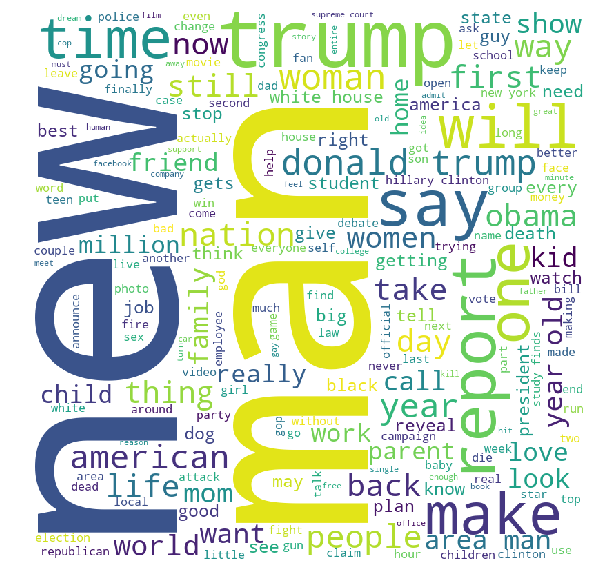

In [12]:
## all articles headlines
comment_words = ' '
stopwords = set(STOPWORDS) 
 
for val in data_frame['headline']: 
    #print(val)  
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '    

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
    
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [16]:
#sarcastic article headlines
for i, val in enumerate(data_frame['headline'],0): 
    if (data_frame['is_sarcastic'][i] == 1):
        #print(val)  
        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '  

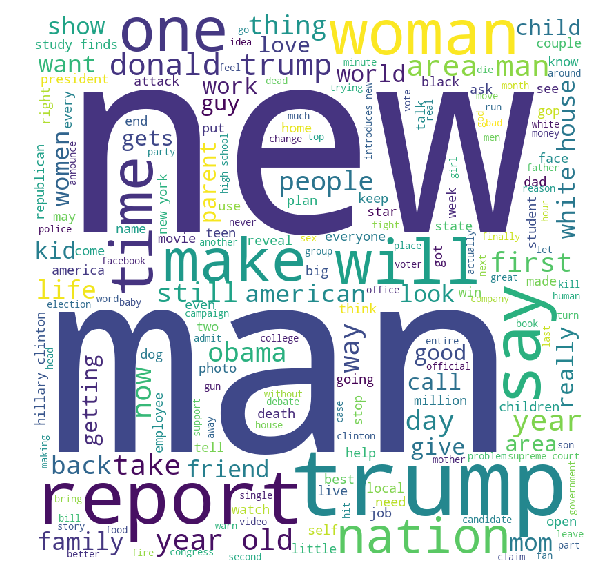

In [17]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
## non_sarcastic article headlines
for i, val in enumerate(data_frame['headline'],1): 
    if (data_frame['is_sarcastic'][i] == 0):
        #print(val)  
        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 